# **SentimentArcs (Part 3): Lexical to Heuristic Models (Python)**

```
Jon Chun
12 Jun 2021: Started
21 Apr 2022: Last Update
```

# **[RESTART RUNTIME] May be Required**

In [ ]:
# [CHECK] (If disconnected) @ometimes you can reconnect to your old machine
#         use %whos to see if your old program enviroment still exists. 
#         If 'Interactive namesapce is empty' you must reexecute everything

%whos

In [ ]:
# [RESTART RUNTIME] May be Required

# !pip install flair

In [ ]:
# [RESTART RUNTIME] May be Required

# !pip install texthero

In [ ]:
# [RESTART RUNTIME] May be Required

# Designed Security Hole in older PyYAML
#   must upgrade to use plotly

# !pip install pyyaml==5.4.1

# **[STEP 1] Manual Configuration/Setup**



## (Popups) Connect Google gDrive

In [1]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive', force_remount=True)
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


## (3 Inputs) Define Directory Tree

In [2]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.

# #@markdown **Instructions**

# #@markdown Set Directory and Corpus names:
# #@markdown <li> Set <b>Path_to_SentimentArcs</b> to the project root in your **GDrive folder**
# #@markdown <li> Set <b>Corpus_Genre</b> = [novels, finance, social_media]
# #@markdown <li> <b>Corpus_Type</b> = [reference_corpus, new_corpus]
# #@markdown <li> <b>Corpus_Number</b> = [1-20] (id nunmber if a new_corpus)

#@markdown <hr>

# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/sentimentarcs_notebooks/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}


#@markdown Set this to the project root in your <b>GDrive folder</b>
#@markdown <br> (e.g. /<wbr><b>gdrive/MyDrive/research/sentiment_arcs/</b>)

#@markdown <hr>

#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

# Corpus_Type = "reference" #@param ["new", "reference"]
Corpus_Type = "new" #@param ["new", "reference"]


Corpus_Number = 3 #@param {type:"slider", min:1, max:10, step:1}


#@markdown Put in the corresponding Subdirectory under **./text_raw**:
#@markdown <li> All Texts as clean <b>plaintext *.txt</b> files 
#@markdown <li> A <b>YAML Configuration File</b> describing each Texts

#@markdown Please verify the required textfiles and YAML file exist in the correct subdirectories before continuing.

print('Current Working Directory:')
%cd $Path_to_SentimentArcs

print('\n')

if Corpus_Type == 'reference':
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_reference'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_reference'
else:
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'

# PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_TEXT_RAW}'
# PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'
PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'

# TODO: Clean up
# SUBDIR_TEXT_CLEAN = PATH_TEXT_CLEAN

print(f'PATH_SENTIMENT_RAW:\n  [{PATH_SENTIMENT_RAW}]')
print(f'SUBDIR_SENTIMENT_RAW:\n  [{SUBDIR_SENTIMENT_RAW}]')

print('\n')

print(f'PATH_TEXT_CLEAN:\n  [{PATH_TEXT_CLEAN}]')
print(f'SUBDIR_TEXT_CLEAN:\n  [{SUBDIR_TEXT_CLEAN}]')

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW:
  [./sentiment_raw/sentiment_raw_novels_new_corpus3/]
SUBDIR_SENTIMENT_RAW:
  [sentiment_raw_novels_new_corpus3/]


PATH_TEXT_CLEAN:
  [./text_clean/text_clean_novels_new_corpus3/]
SUBDIR_TEXT_CLEAN:
  [text_clean_novels_new_corpus3/]


# **[STEP 2] Automatic Configuration/Setup**

In [3]:
# Add PATH for ./utils subdirectory

import sys
import os

!python --version

print('\n')

PATH_UTILS = f'{Path_to_SentimentArcs}utils'
PATH_UTILS

sys.path.append(PATH_UTILS)

print('Contents of Subdirectory [./sentiment_arcs/utils/]\n')
!ls $PATH_UTILS

# More Specific than PATH for searching libraries
# !echo $PYTHONPATH

Python 3.7.13


Contents of Subdirectory [./sentiment_arcs/utils/]

config_matplotlib.py   get_subdirs.py	    sentiment_analysis.py
config_seaborn.py      global_constants.py  sentiment_arcs_config.py
file_utils.py	       global_vars.py	    set_globals.py
get_fullpath.py        __init__.py	    subdir_constants.py
get_model_families.py  __pycache__	    text_cleaners_new.py
get_sentimentr.R       read_yaml.py	    text_cleaners.py
get_sentiments.py      sa_config.py


In [5]:
# Review Global Variables and set the first few

import global_vars as global_vars

global_vars.SUBDIR_SENTIMENTARCS = Path_to_SentimentArcs
global_vars.Corpus_Genre = Corpus_Genre
global_vars.Corpus_Type = Corpus_Type
global_vars.Corpus_Number = Corpus_Number

global_vars.SUBDIR_SENTIMENT_RAW = SUBDIR_SENTIMENT_RAW
global_vars.PATH_SENTIMENT_RAW = PATH_SENTIMENT_RAW

global_vars.SUBDIR_TEXT_CLEAN = SUBDIR_TEXT_CLEAN
global_vars.PATH_TEXT_CLEAN = PATH_TEXT_CLEAN

dir(global_vars)

['Corpus_Genre',
 'Corpus_Number',
 'Corpus_Type',
 'FNAME_SENTIMENT_RAW',
 'MIN_PARAG_LEN',
 'MIN_SENT_LEN',
 'NotebookModels',
 'PATH_SENTIMENT_RAW',
 'PATH_TEXT_CLEAN',
 'PATH_TEXT_RAW_CORPUS',
 'SLANG_DT',
 'STOPWORDS_ADD_EN',
 'STOPWORDS_DEL_EN',
 'SUBDIR_CRUXES',
 'SUBDIR_DATA',
 'SUBDIR_GRAPHS',
 'SUBDIR_SENTIMENTARCS',
 'SUBDIR_SENTIMENT_CLEAN',
 'SUBDIR_SENTIMENT_RAW',
 'SUBDIR_TEXT_CLEAN',
 'SUBDIR_TEXT_RAW',
 'SUBDIR_TIMESERIES_CLEAN',
 'SUBDIR_TIMESERIES_RAW',
 'SUBDIR_UTILS',
 'TEST_SENTENCES_LS',
 'TEST_WORDS_LS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'corpus_texts_dt',
 'corpus_titles_dt',
 'corpus_titles_ls',
 'lexicons_dt',
 'model_ensemble_dt',
 'model_titles_dt']

## (each time) Custom Libraries & Define Globals

In [6]:
# Initialize and clean for each iteration of notebook

# dir(global_vars)

global_vars.corpus_texts_dt = {}
global_vars.corpus_titles_dt = {}

In [7]:
# Import SentimentArcs Utilities to define Directory Structure
#   based the Selected Corpus Genre, Type and Number

!pwd 
print('\n')

# from utils import sa_config # .sentiment_arcs_utils
from utils import sa_config

print('Objects in sa_config()')
print(dir(sa_config))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
sa_config.get_subdirs(Path_to_SentimentArcs, Corpus_Genre, Corpus_Type, Corpus_Number, 'none')


/gdrive/MyDrive/sentimentarcs_notebooks


Objects in sa_config()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_subdirs', 'global_vars', 'set_globals']


Verify the Directory Structure:

-------------------------------

           [Corpus Genre]: novels

            [Corpus Type]: new


    [FNAME_SENTIMENT_RAW]: [NONE]




INPUTS:
-------------------------------

   [SUBDIR_SENTIMENTARCS]: /gdrive/MyDrive/sentimentarcs_notebooks/


STEP 1: Clean Text
--------------------

        [SUBDIR_TEXT_RAW]: ./text_raw/text_raw_novels_new_corpus3/

      [SUBDIR_TEXT_CLEAN]: ./text_clean/text_clean_novels_new_corpus3/


STEP 2: Get Sentiments
--------------------

   [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/sentiment_raw_novels_new_corpus3/

 [SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/sentiment_clean_novels_new_corpus3/


STEP 3: Smooth Time Series and Get Crux Points
--------------------

  [SUBDIR_TIMESERIES_RAW]: ./sentiment_ra

In [9]:
# Call SentimentArcs Utility to define Global Variables

sa_config.set_globals()

# Verify sample global var set
print(f'MIN_PARAG_LEN: {global_vars.MIN_PARAG_LEN}')
print(f'STOPWORDS_ADD_EN: {global_vars.STOPWORDS_ADD_EN}')
print(f'global_vars.TEST_WORDS_LS: {global_vars.TEST_WORDS_LS}')
print(f'SLANG_DT: {global_vars.SLANG_DT}')

MIN_PARAG_LEN: 10
STOPWORDS_ADD_EN: ['a', 'the', 'an']
global_vars.TEST_WORDS_LS: ['Love', 'Hate', 'bizarre', 'strange', 'furious', 'elated', 'curious', 'beserk', 'gambaro']
SLANG_DT: {'$': ' dollar ', '€': ' euro ', '4ao': 'for adults only', 'a.m': 'before midday', 'a3': 'anytime anywhere anyplace', 'aamof': 'as a matter of fact', 'acct': 'account', 'adih': 'another day in hell', 'afaic': 'as far as i am concerned', 'afaict': 'as far as i can tell', 'afaik': 'as far as i know', 'afair': 'as far as i remember', 'afk': 'away from keyboard', 'app': 'application', 'approx': 'approximately', 'apps': 'applications', 'asap': 'as soon as possible', 'asl': 'age, sex, location', 'atk': 'at the keyboard', 'ave.': 'avenue', 'aymm': 'are you my mother', 'ayor': 'at your own risk', 'b&b': 'bed and breakfast', 'b+b': 'bed and breakfast', 'b.c': 'before christ', 'b2b': 'business to business', 'b2c': 'business to customer', 'b4': 'before', 'b4n': 'bye for now', 'b@u': 'back at you', 'bae': 'before any

## Configure Jupyter Notebook

In [10]:
# Configure Jupyter

# To reload modules under development

# Option (a)
%load_ext autoreload
%autoreload 2
# Option (b)
# import importlib
# importlib.reload(functions.readfunctions)


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## (each time) Read YAML Configuration for Corpus and Models 

In [11]:
# from utils import sa_config # .sentiment_arcs_utils

import yaml

from utils import read_yaml

print('Objects in read_yaml()')
print(dir(read_yaml))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
read_yaml.read_corpus_yaml(Corpus_Genre, Corpus_Type, Corpus_Number)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = global_vars.models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = list(global_vars.corpus_titles_dt.keys())
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

global_vars.corpus_titles_dt

Objects in read_yaml()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'global_vars', 'read_corpus_yaml', 'yaml']


YAML Directory: text_raw/text_raw_novels_new_corpus3
YAML File: text_raw_novels_new_corpus3_info.yaml
SentimentArcs Model Ensemble ------------------------------

AutoGluon_Text
BERT_2IMDB
BERT_Dual_Coding
BERT_Multilingual
BERT_Yelp
CNN_DNN
Distilled_BERT
FLAML_AutoML
Fully_Connected_Network
HyperOpt_CNN_Flair_AutoML
LSTM_DNN
Logistic_Regression
Logistic_Regression_CV
Multilingual_CNN_Stanza_AutoML
Multinomial_Naive_Bayes
Pattern
Random_Forest
RoBERTa_Large_15DB
RoBERTa_XML_8Language
FinBERT
FinBERT_Tone
DistilRoBERTa_FinNews
SentimentR_JockersRinker
SentimentR_Jockers
SentimentR_Bing
SentimentR_NRC
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_LMcD
SentimentR_SentimentR
PySentimentR_JockersRinker
PySentimentR_Huliu
PySentimentR_NRC
PySentimentR_SentiWord
PySentimentR_SenticNet
PySentimentR_LMcD
SyuzhetR_A

{'imcewan_machineslikeme': ['Machines Like Me by Ian McEwan', 2019, 0]}

## Install Libraries: Python

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from glob import glob
import copy
from collections import Counter
import json # Installed above in YAML Configuration Section

2022-04-22 09:21:26,041 : INFO : NumExpr defaulting to 2 threads.


## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [13]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------')
print('\n  (Uncomment to view)')
# plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')




 New figure size:  (20, 10)
Matplotlib Configuration ------------------------------

  (Uncomment to view)

  Edit ./utils/config_matplotlib.py to change


## Setup Seaborn Style

In [14]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')

"""
# Seaborn: Set Context
# sns.set_context("notebook")

# Seaborn: Set Theme (Scale of Font)
sns.set_theme('paper')  # paper, notebook, talk, poster

# Seaborn: Set Style
# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks
plt.style.use('seaborn-whitegrid')

# sns.set_palette('tab10')
# sns.color_palette()

# sns.set_palette('tab10')
# sns.color_palette()
""";




Seaborn Configuration ------------------------------



In [15]:
"""
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')
""";

## (each time) Python Utility Functions

### (each time) Generate Convenient Data Lists

In [16]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
global_vars.corpus_titles_dt
print('\n')

corpus_texts_ls = list(global_vars.corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(global_vars.corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


Dictionary: corpus_titles_dt


{'imcewan_machineslikeme': ['Machines Like Me by Ian McEwan', 2019, 0]}




Corpus Texts:
  imcewan_machineslikeme



Natural Corpus Titles:
  Machines Like Me by Ian McEwan


In [17]:
# Get Model Families of Ensemble

from utils.get_model_families import get_ensemble_model_famalies

global_vars.models_ensemble_dt = get_ensemble_model_famalies(global_vars.models_titles_dt)

print('\nTest: Lexicon Family of Models:')
global_vars.models_ensemble_dt['lexicon']


There are 12 Lexicon Models
  Lexicon Model #0: sentimentr_sentimentr
  Lexicon Model #1: pysentimentr_jockersrinker
  Lexicon Model #2: pysentimentr_huliu
  Lexicon Model #3: pysentimentr_nrc
  Lexicon Model #4: pysentimentr_sentiword
  Lexicon Model #5: pysentimentr_senticnet
  Lexicon Model #6: pysentimentr_lmcd
  Lexicon Model #7: syuzhetr_afinn
  Lexicon Model #8: syuzhetr_bing
  Lexicon Model #9: syuzhetr_nrc
  Lexicon Model #10: syuzhetr_syuzhetr
  Lexicon Model #11: afinn

There are 9 Heuristic Models
  Heuristic Model #0: pattern
  Heuristic Model #1: sentimentr_jockersrinker
  Heuristic Model #2: sentimentr_jockers
  Heuristic Model #3: sentimentr_bing
  Heuristic Model #4: sentimentr_nrc
  Heuristic Model #5: sentimentr_sentiword
  Heuristic Model #6: sentimentr_senticnet
  Heuristic Model #7: sentimentr_lmcd
  Heuristic Model #8: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg


['sentimentr_sentimentr',
 'pysentimentr_jockersrinker',
 'pysentimentr_huliu',
 'pysentimentr_nrc',
 'pysentimentr_sentiword',
 'pysentimentr_senticnet',
 'pysentimentr_lmcd',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr',
 'afinn']

### File Functions

In [18]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/file_utils.py'
# from utils.file_utils import *

# %run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read all Preprocessed Novels**

In [19]:
# Verify cwd and subdir of Cleaned Corpus Texts

print('Current Working Directory:')
!pwd

print(f'\nSubdir with all Cleaned Texts of Corpus:\n  {SUBDIR_TEXT_CLEAN}')

print(f'\n\nFilenames of Cleaned Texts:\n')
!ls -1 {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks

Subdir with all Cleaned Texts of Corpus:
  text_clean_novels_new_corpus3/


Filenames of Cleaned Texts:

imcewan_machineslikeme.csv


In [20]:
# Create a List (preprocessed_ls) of all preprocessed text files

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

try:
    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

imcewan_machineslikeme


Found 1 Preprocessed files in text_clean_novels_new_corpus3/


In [21]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

corpus_texts_dt = {}

for i,atext in enumerate(preprocessed_ls):
  print(f'Processing #{i}: {atext}...')
  afile_fullpath = f'{PATH_TEXT_CLEAN}/{atext}.csv'
  print(f'               {afile_fullpath}')
  atext_df = pd.read_csv(afile_fullpath, index_col=[0])
  corpus_texts_dt[atext] = atext_df

# Verify the Text read into master Dictionary of DataFrames
print('\n')
corpus_texts_dt.keys()
print('\n')
print(f'There were {len(corpus_texts_dt)} preprocessed Text read into the Dict corpus_texts_dt')

Processing #0: imcewan_machineslikeme...
               ./text_clean/text_clean_novels_new_corpus3//imcewan_machineslikeme.csv




dict_keys(['imcewan_machineslikeme'])



There were 1 preprocessed Text read into the Dict corpus_texts_dt


In [22]:
# Check if there are any Null strings in the text_clean columns

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  print(f'\nText #{i}: {atext}')
  nan_ct = corpus_texts_dt[atext].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')


Text #0: imcewan_machineslikeme
      16 Null strings in the text_clean column


In [23]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  corpus_texts_dt[atext][corpus_texts_dt[atext].text_clean.isna()] = 'empty_string'

In [24]:
# Verify DataFrame of first Text in Corpus Dictionary

corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  
0  but remember please the law by which we live w...  
1  it be religious yearn grant hope it be the hol...  
2  our ambition run high and low for a creation m...  
3  a soon a it be feasible we have no choice but ...  
4  in lofty term we aim to escape our mortality c...

# **[STEP 4] Get Sentiments**

## **Lexicons**

* https://github.com/trinker/lexicon/tree/master/data

In [25]:
# PyReadR enables Python to read R datafiles (e.g. *.rda)

!pip install pyreadr

import pyreadr

     |████████████████████████████████| 361 kB 8.5 MB/s 


In [26]:
# Global Dict of all Lexicon Dictionaries

lexicons_dt = {}

In [27]:
def get_lexsent_sentiment(asent_str, lexicon_dt):
  '''
  Given a Sentence in string form and a Lexicon Dictionary
  Return the Sentiment of the Sentence = Sum(Sentiment(all words))
  '''

  sent_sentiment = 0
  word_ls = asent_str.split()
  for aword in word_ls:
    word_sentiment = lexicon_dt.get(aword)
    if word_sentiment != None:
      sent_sentiment += float(word_sentiment)

  return sent_sentiment

### **Jockers-Rinker**

In [28]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_jockersrinker'
model_type = 'Lexicon'

url = f"https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_{lexicon_name}.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11710 entries, 0 to 11709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11710 non-null  object 
 1   y       11710 non-null  float64
dtypes: float64(1), object(1)
memory usage: 183.1+ KB


Testing jockers_rinker lexicon for WORDS Sentiment
--------------------------------------------------
[  0.75  ]: Love

[ -0.75  ]: Hate

[ -0.75  ]: bizarre

[  -0.5  ]: strange

[  -1.0  ]: furious

[  1.0   ]: elated

[  0.4   ]: curious

[ ERROR  ]: beserk [NOT IN LEXICON]

[ ERROR  ]: gambaro [NOT IN LEXICON]


Testing jockers_rinker lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -3.25  ]: I hate bad evil worthless Mondays.

[  0.75  ]: I love Paris in the springtime

[   0    ]: It was Wednesday.

[ -2.25  ]: You are a disgusting pig - I hate you.

[  3.3   ]: What a delightfully funny and beautiful good man.

[   0    ]: That was it



In [29]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))
  

Processing #0: imcewan_machineslikeme


In [30]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  
0                        1.40  
1                        1.25  
2                        0.60  
3                        1.15  
4                       -0.85

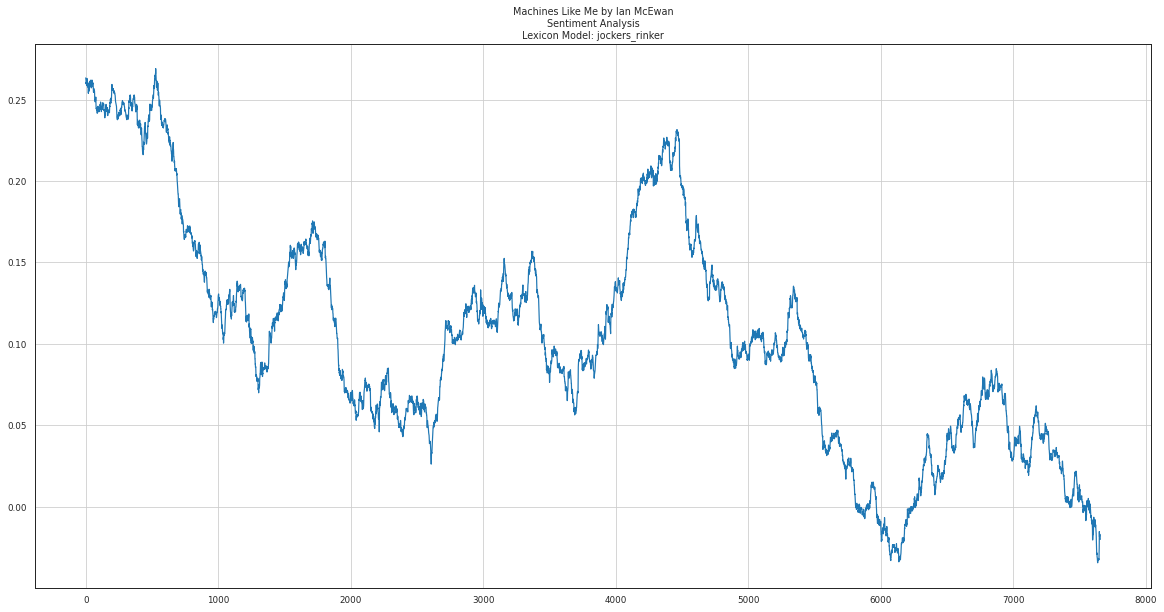

In [31]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **HuLiu (aka Bing)**

In [32]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'huliu'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_huliu'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_huliu.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       6874 non-null   object 
 1   y       6874 non-null   float64
dtypes: float64(1), object(1)
memory usage: 107.5+ KB


Testing huliu lexicon for WORDS Sentiment
--------------------------------------------------
[  1.0   ]: Love

[  -1.0  ]: Hate

[  -1.0  ]: bizarre

[  -1.0  ]: strange

[  -1.0  ]: furious

[  1.0   ]: elated

[ ERROR  ]: curious [NOT IN LEXICON]

[ ERROR  ]: beserk [NOT IN LEXICON]

[ ERROR  ]: gambaro [NOT IN LEXICON]


Testing huliu lexicon for SENTENCES Sentiment
--------------------------------------------------
[  -4.0  ]: I hate bad evil worthless Mondays.

[  1.0   ]: I love Paris in the springtime

[   0    ]: It was Wednesday.

[  -3.0  ]: You are a disgusting pig - I hate you.

[  4.0   ]: What a delightfully funny and beautiful good man.

[   0    ]: That was it



In [33]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

Processing #0: imcewan_machineslikeme


In [34]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  
0                        1.40                -1.0  
1                        1.25                 1.0  
2                        0.60                -1.0  
3                        1.15                 0.0  
4                       -0.85                 0.0

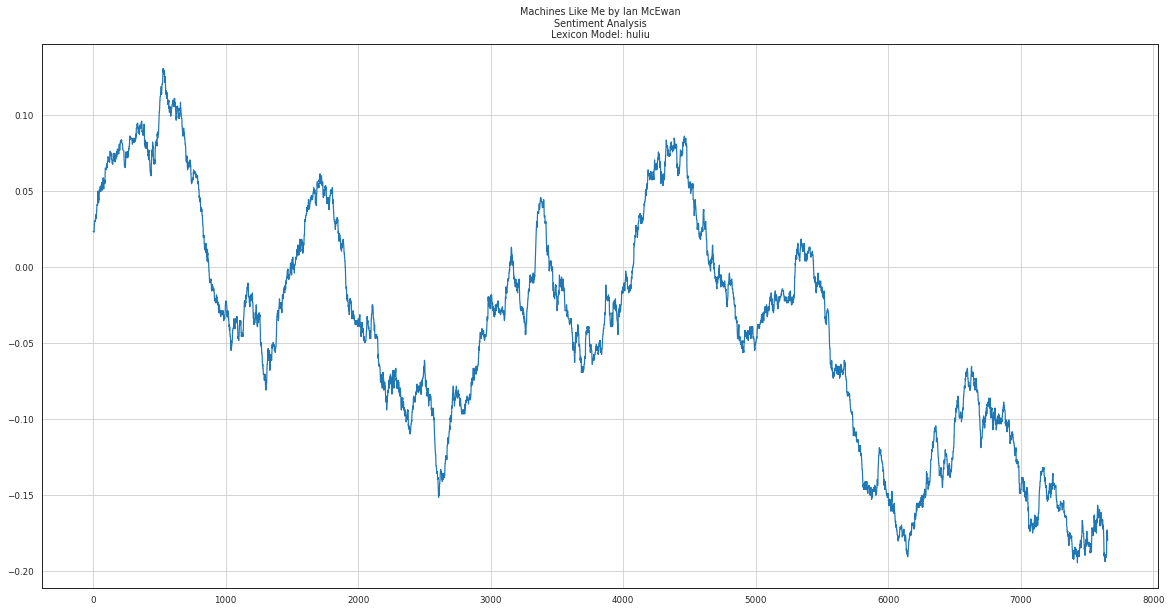

In [35]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **NRC**

In [36]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'nrc'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_nrc'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_nrc.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       5468 non-null   object
 1   y       5468 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 64.2+ KB


Testing nrc lexicon for WORDS Sentiment
--------------------------------------------------
[   1    ]: Love

[   -1   ]: Hate

[   -1   ]: bizarre

[ ERROR  ]: strange [NOT IN LEXICON]

[   -1   ]: furious

[   1    ]: elated

[ ERROR  ]: curious [NOT IN LEXICON]

[ ERROR  ]: beserk [NOT IN LEXICON]

[ ERROR  ]: gambaro [NOT IN LEXICON]


Testing nrc lexicon for SENTENCES Sentiment
--------------------------------------------------
[  -4.0  ]: I hate bad evil worthless Mondays.

[  1.0   ]: I love Paris in the springtime

[   0    ]: It was Wednesday.

[  -3.0  ]: You are a disgusting pig - I hate you.

[  2.0   ]: What a delightfully funny and beautiful good man.

[   0    ]: That was it

In [37]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

Processing #0: imcewan_machineslikeme


In [38]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  
0                        1.40                -1.0               1.0  
1                        1.25                 1.0               3.0  
2                        0.60                -1.0               2.0  
3                        1.15                 0.0               1.0  
4                       -0.85                 0.0              -1.0

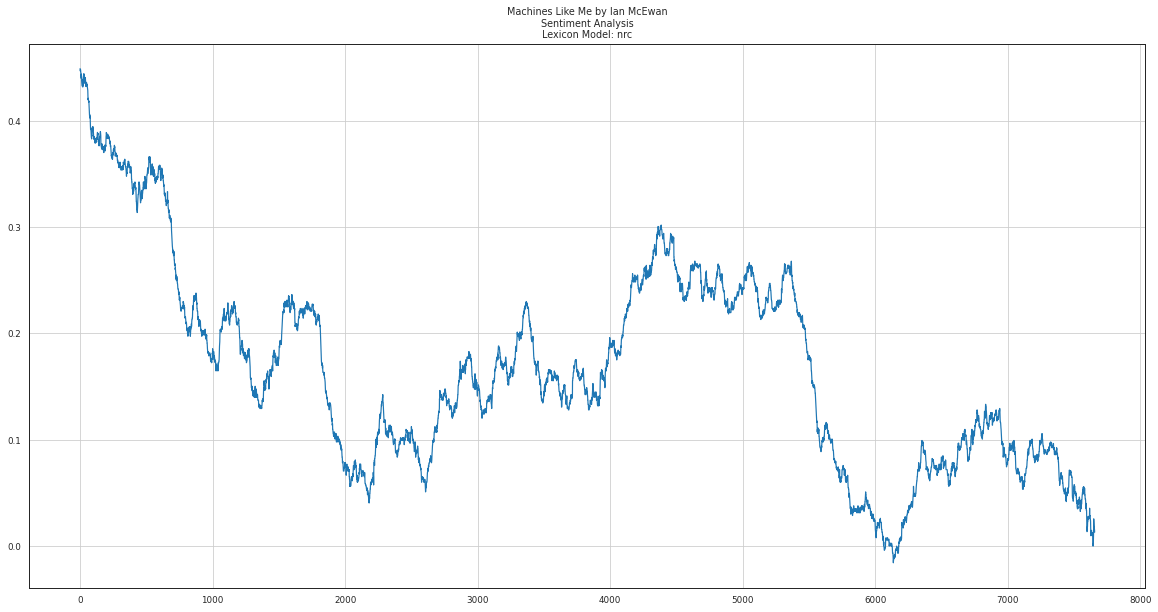

In [39]:
# Plot New Lexicon Values

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **SentiWord**

* https://www.sentic.net/sentic-patterns.pdf
* https://www.quora.com/Sentiment-Analysis-How-does-CLiPS-Pattern-calculate-the-polarity-of-a-sentence-What-is-the-maths-involved-in-it 
* https://github.com/clips/pattern/wiki/pattern-en#sentiment


In [40]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'sentiword'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_sentiword'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_sentiword.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(aword_str.lower()) is None):
    # print(f'ERROR: {aword_str} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {aword_str} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(aword_str.lower())
    print(f'[{word_sentiment_fl: ^8}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(asent_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {asent_str}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20093 non-null  object 
 1   y       20093 non-null  float64
dtypes: float64(1), object(1)
memory usage: 314.1+ KB


Testing sentiword lexicon for WORDS Sentiment
--------------------------------------------------
[ 0.375  ]: Love

[ -0.25  ]: Hate

[ ERROR  ]: bizarre [NOT IN LEXICON]

[ ERROR  ]: strange [NOT IN LEXICON]

[ -0.125 ]: furious

[ ERROR  ]: elated [NOT IN LEXICON]

[ ERROR  ]: curious [NOT IN LEXICON]

[ ERROR  ]: beserk [NOT IN LEXICON]

[ ERROR  ]: gambaro [NOT IN LEXICON]


Testing sentiword lexicon for SENTENCES Sentiment
--------------------------------------------------
[-1.1428571428571428]: I hate bad evil worthless Mondays.

[ 0.375  ]: I love Paris in the springtime

[   0    ]: It was Wednesday.

[ -0.375 ]: You are a disgusting pig - I hate you.

[1.09375 ]: What a d

In [41]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

Processing #0: imcewan_machineslikeme


In [42]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  
0                0.416667  
1                0.375000  
2                0.050000  
3                0.375000  
4               -1.104167

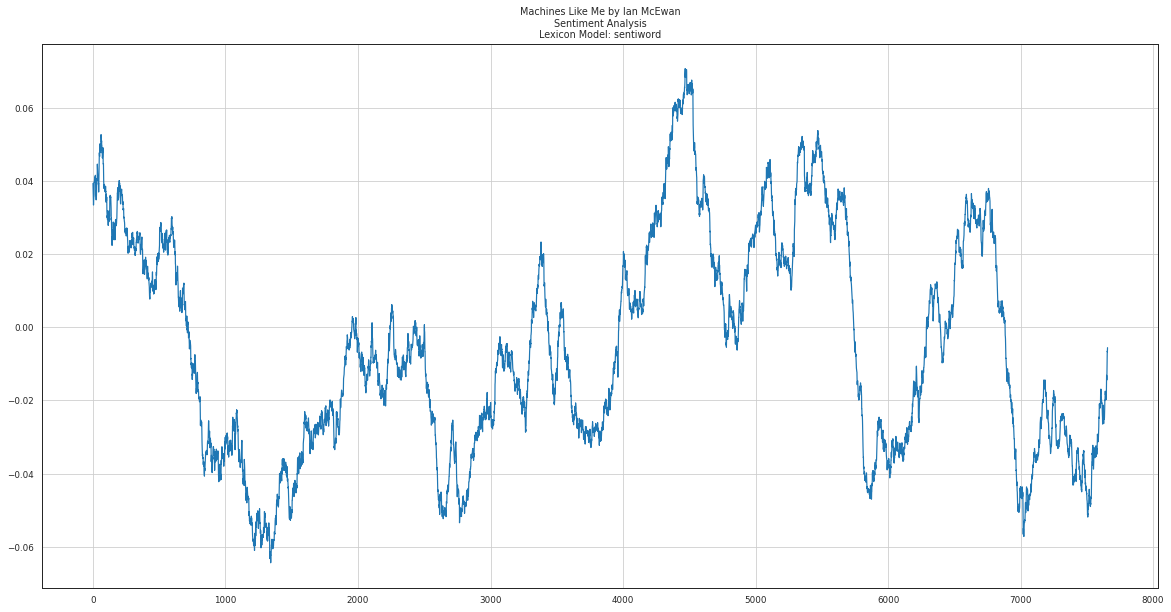

In [43]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **SenticNet**

In [44]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'senticnet'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_senticnet'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_senticnet.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23626 entries, 0 to 23625
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       23626 non-null  object 
 1   y       23626 non-null  float64
dtypes: float64(1), object(1)
memory usage: 369.3+ KB


Testing senticnet lexicon for WORDS Sentiment
--------------------------------------------------
[ 0.655  ]: Love

[ -0.83  ]: Hate

[ 0.569  ]: bizarre

[ -0.26  ]: strange

[ -0.41  ]: furious

[ 0.441  ]: elated

[ 0.314  ]: curious

[ ERROR  ]: beserk [NOT IN LEXICON]

[ ERROR  ]: gambaro [NOT IN LEXICON]


Testing senticnet lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -2.36  ]: I hate bad evil worthless Mondays.

[ 0.655  ]: I love Paris in the springtime

[   0    ]: It was Wednesday.

[ -1.24  ]: You are a disgusting pig - I hate you.

[1.8210000000000002]: What a delightfully funny and beautiful good man.

[   0    ]: That was it



In [45]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

Processing #0: imcewan_machineslikeme


In [46]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  
0                0.416667                   3.690  
1                0.375000                   3.742  
2                0.050000                   1.389  
3                0.375000                   0.738  
4               -1.104167                   0.836

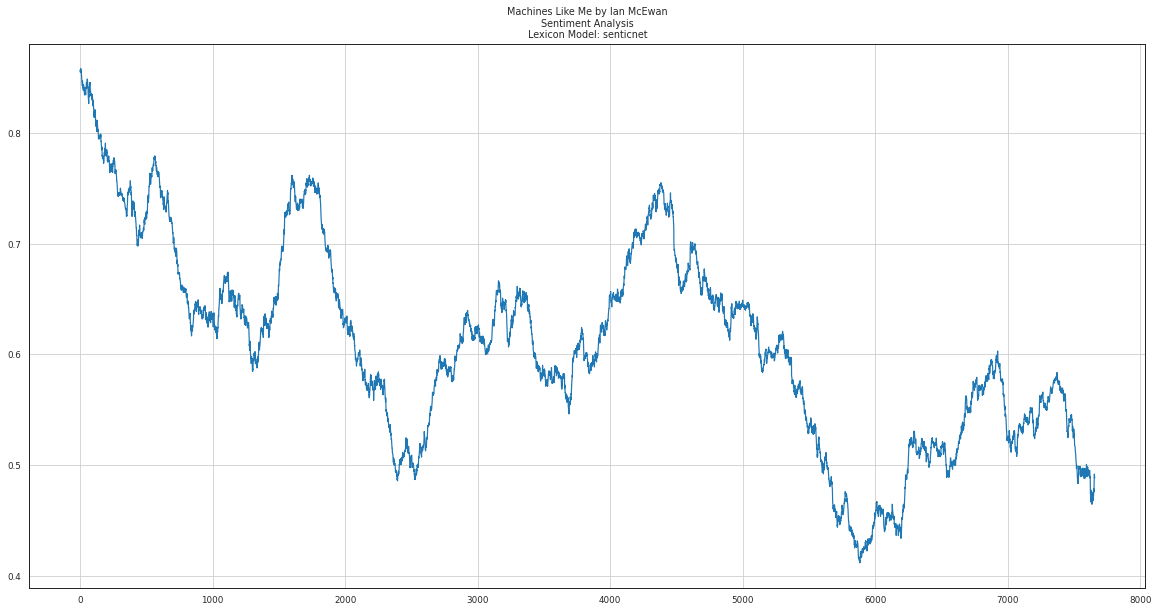

In [47]:
# Plot New Lexicon Values

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **Loughran-McDonald**

In [48]:
# Get Lexicon from SentimentR github repo

lexicon_name = 'loughran_mcdonald'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pysentimentr_lmcd'
model_type = 'Lexicon'

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_loughran_mcdonald.rda?raw=true"
dst_path = f"{lexicon_dense}.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
# print(f'type(res): {type(res)}\n')
# res

# Convert to DataFrame
lexicon_df = res[f'hash_sentiment_{lexicon_name}']
# lexicon_df.head()
lexicon_df.info()
print('\n')

# Reshape into Dictionary[word] = sentiment
lexicon_df.set_index('x', inplace=True)
lexicons_dt[lexicon_name] = lexicon_df.to_dict()['y']

# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, atest_word in enumerate(global_vars.TEST_WORDS_LS):

  if (lexicons_dt[lexicon_name].get(atest_word.lower()) is None):
    # print(f'ERROR: {atest_word} not found in lexicon')
    word_sentiment_fl = 'ERROR'
    print(f'[{word_sentiment_fl: ^8}]: {atest_word} [NOT IN LEXICON]\n')
    continue
  else:
    word_sentiment_fl = lexicons_dt[lexicon_name].get(atest_word.lower())
    print(f'[{word_sentiment_fl: ^8}]: {atest_word}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, atest_str in enumerate(global_vars.TEST_SENTENCES_LS):

  str_sentiment_fl = get_lexsent_sentiment(atest_str, lexicons_dt[lexicon_name])
  print(f'[{str_sentiment_fl: ^8}]: {atest_str}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2702 non-null   object 
 1   y       2702 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.3+ KB


Testing loughran_mcdonald lexicon for WORDS Sentiment
--------------------------------------------------
[ ERROR  ]: Love [NOT IN LEXICON]

[ ERROR  ]: Hate [NOT IN LEXICON]

[ ERROR  ]: bizarre [NOT IN LEXICON]

[ ERROR  ]: strange [NOT IN LEXICON]

[ ERROR  ]: furious [NOT IN LEXICON]

[ ERROR  ]: elated [NOT IN LEXICON]

[ ERROR  ]: curious [NOT IN LEXICON]

[ ERROR  ]: beserk [NOT IN LEXICON]

[ ERROR  ]: gambaro [NOT IN LEXICON]


Testing loughran_mcdonald lexicon for SENTENCES Sentiment
--------------------------------------------------
[  -2.0  ]: I hate bad evil worthless Mondays.

[   0    ]: I love Paris in the springtime

[   0    ]: It was Wednesday.

[   0    ]: You are

In [49]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: get_lexsent_sentiment(x, lexicons_dt[lexicon_name]))

Processing #0: imcewan_machineslikeme


In [50]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  pysentimentr_lmcd  
0                0.416667                   3.690               -1.0  
1                0.375000                   3.742                0.0  
2                0.050000                   1.389                0.0  
3                0.375000                   0.738                0.0  
4               -1.104167                   0.836                0.0

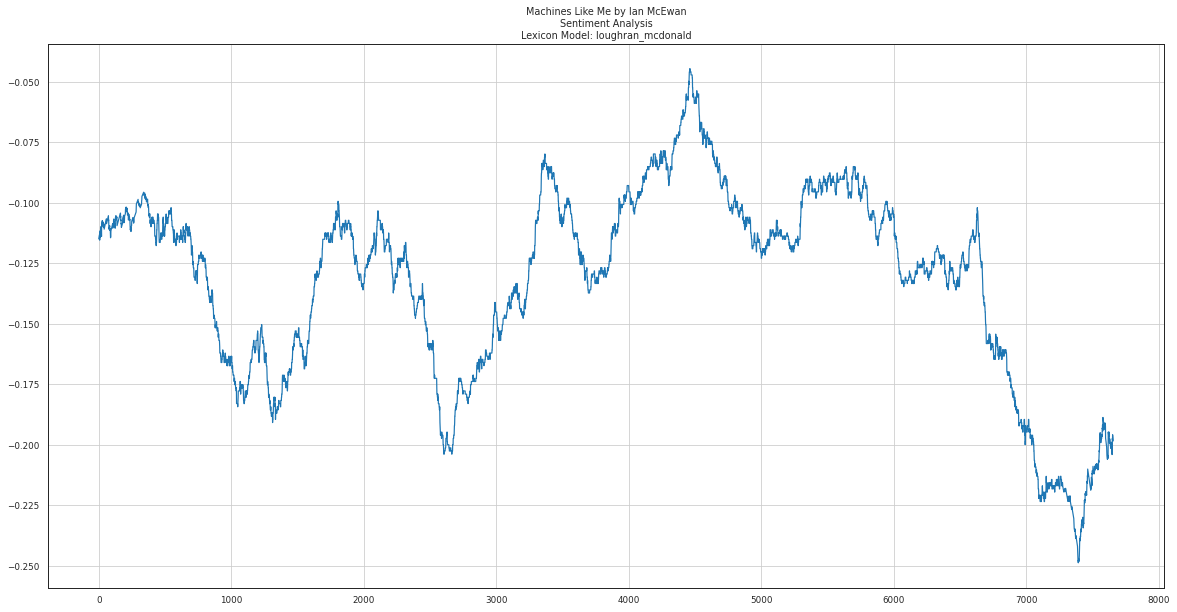

In [51]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

### **AFINN**

In [52]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=9380074b10f887e4121742395f314f7ceb6753fb363f268008c5ee9d30fb9498
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [53]:
from afinn import Afinn
afinn = Afinn(language='en')

lexicon_name = 'AFINN'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'afinn'
model_type = 'Lexicon'

In [54]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = afinn.score(aword_str.lower())
  print(f'[{word_sentiment_fl: ^8}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  words_ls = asent_str.split()
  sent_sentiment_fl = 0.0

  for j, atest_word in enumerate(words_ls):
    sent_sentiment_fl += afinn.score(atest_word.lower())

  print(f'[{sent_sentiment_fl: ^8}]: {asent_str}\n')

Testing AFINN lexicon for WORDS Sentiment
--------------------------------------------------
[  3.0   ]: Love

[  -3.0  ]: Hate

[  -2.0  ]: bizarre

[  -1.0  ]: strange

[  -3.0  ]: furious

[  3.0   ]: elated

[  1.0   ]: curious

[  0.0   ]: beserk

[  0.0   ]: gambaro


Testing AFINN lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -11.0  ]: I hate bad evil worthless Mondays.

[  3.0   ]: I love Paris in the springtime

[  0.0   ]: It was Wednesday.

[  -6.0  ]: You are a disgusting pig - I hate you.

[  13.0  ]: What a delightfully funny and beautiful good man.

[  0.0   ]: That was it



In [55]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: afinn.score(x.lower()))

Processing #0: imcewan_machineslikeme


In [56]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  pysentimentr_lmcd  afinn  
0                0.416667                   3.690               -1.0    1.0  
1                0.375000                   3.742                0.0    3.0  
2                0.050000                   1.389                0.0    2.0  
3                0.375000                   0.738                0.0    0.0  
4               -1.104167                   0.836                0.0    2.0

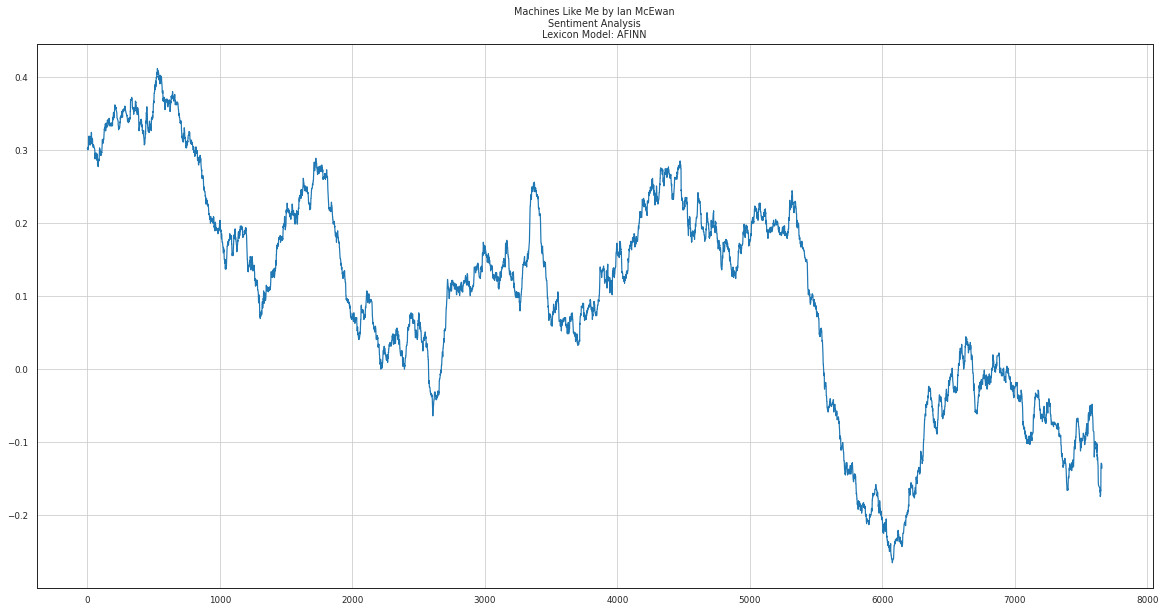

In [57]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

#### **Save Checkpoint**

In [58]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

/gdrive/MyDrive/sentimentarcs_notebooks


SUBDIR_SENTIMENT_RAW: sentiment_raw_novels_new_corpus3/


Existing Sentiment Datafiles in Destination Subdir:



In [59]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Corpus_Genre: novels
        Corpus_Type: new
      Corpus_Number: 3

These Text Titles:



dict_keys(['imcewan_machineslikeme'])

In [60]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_7lex.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_7lex.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

Saving to:
  sentiment_raw_novels_new_corpus3_all_7lex.json
Writing to subdir:
  ./sentiment_raw/sentiment_raw_novels_new_corpus3/
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus3/sentiment_raw_novels_new_corpus3_all_7lex.json


In [61]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

total 3695
-rw------- 1 root root 3783384 Apr 22 09:26 sentiment_raw_novels_new_corpus3_all_7lex.json


In [ ]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=subdir_path)
test_dt.keys()
print('\n')
test_dt[corpus_texts_ls[0]].info()

## **Lexicons + Heuristics**

### **VADER**

In [62]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.2 MB/s 


In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

lexicon_name = 'VADER'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'vader'
model_type = 'Heuristic'

test_str = "The food was great!"

vs = vader_analyzer.polarity_scores(test_str)
print("{:-<65} {}".format(test_str, str(vs)))

The food was great!---------------------------------------------- {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [64]:
def sent2vader_comp(asent_str):
  '''
  Given a Sentence as a text string
  Return a Sentiment = sum(VADER sentiments for each word)
  '''

  words_ls = asent_str.split()
  sent_sentiment_fl = 0.0

  for j, atest_word in enumerate(words_ls):
    sent_sentiment_fl += vader_analyzer.polarity_scores(atest_word.lower())['compound']

  return sent_sentiment_fl


In [65]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # print(f'Looking up VADER sentiment for {aword_str}')
  word_sentiment_fl = vader_analyzer.polarity_scores(aword_str.lower())['compound']
  print(f'[{word_sentiment_fl: ^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sent2vader_comp(asent_str)
  print(f'[{sent_sentiment_fl: ^8.3f}]: {asent_str}\n')


Testing VADER lexicon for WORDS Sentiment
--------------------------------------------------
[ 0.637  ]: Love

[ -0.572 ]: Hate

[ -0.318 ]: bizarre

[ -0.202 ]: strange

[ -0.572 ]: furious

[ 0.637  ]: elated

[ 0.318  ]: curious

[ 0.000  ]: beserk

[ 0.000  ]: gambaro


Testing VADER lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -2.214 ]: I hate bad evil worthless Mondays.

[ 0.637  ]: I love Paris in the springtime

[ 0.000  ]: It was Wednesday.

[ -1.099 ]: You are a disgusting pig - I hate you.

[ 2.052  ]: What a delightfully funny and beautiful good man.

[ 0.000  ]: That was it



In [66]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: sent2vader_comp(x.lower()))

Processing #0: imcewan_machineslikeme


In [67]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  pysentimentr_lmcd  afinn  \
0                0.416667                   3.690               -1.0    1.0   
1                0.375000                   3.742                0.0    3.0   
2                0.050000                   1.389                0.0    2.0   
3                0.375000                   0.738                0.0    0.0   
4               -1.104167                   0.836                0.0    2.0   

    vader  
0  0.3182  
1  0.8016  
2  0.6369  
3  0.1059  
4  0.5719

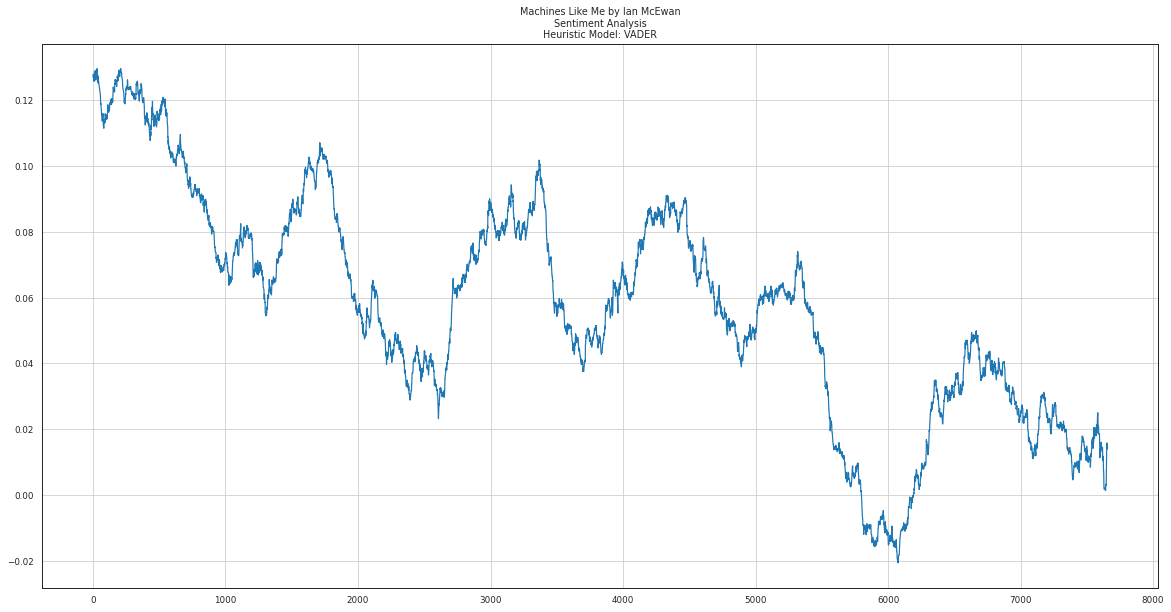

In [68]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

#### **Save Checkpoint**

In [69]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

/gdrive/MyDrive/sentimentarcs_notebooks


SUBDIR_SENTIMENT_RAW: sentiment_raw_novels_new_corpus3/


Existing Sentiment Datafiles in Destination Subdir:

sentiment_raw_novels_new_corpus3_all_7lex.json


In [70]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Corpus_Genre: novels
        Corpus_Type: new
      Corpus_Number: 3

These Text Titles:



dict_keys(['imcewan_machineslikeme'])

In [71]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_1heu.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_1hur.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

Saving to:
  sentiment_raw_novels_new_corpus3_all_1heu.json
Writing to subdir:
  ./sentiment_raw/sentiment_raw_novels_new_corpus3/
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus3/sentiment_raw_novels_new_corpus3_all_1heu.json


In [72]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

total 7608
-rw------- 1 root root 3783384 Apr 22 09:26 sentiment_raw_novels_new_corpus3_all_7lex.json
-rw------- 1 root root 4006294 Apr 22 09:27 sentiment_raw_novels_new_corpus3_all_1heu.json


In [73]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=subdir_path)
test_dt.keys()
print('\n')
test_dt[corpus_texts_ls[0]].info()

dict_keys(['imcewan_machineslikeme'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   afinn                       7657 non-null   float64
 1   pysentimentr_huliu          7657 non-null   float64
 2   pysentimentr_jockersrinker  7657 non-null   float64
 3   pysentimentr_lmcd           7657 non-null   float64
 4   pysentimentr_nrc            7657 non-null   float64
 5   pysentimentr_senticnet      7657 non-null   float64
 6   pysentimentr_sentiword      7657 non-null   float64
 7   text_clean                  7657 non-null   object 
 8   text_raw                    7657 non-null   object 
 9   vader                       7657 non-null   float64
dtypes: float64(8), object(2)
memory usage: 598.3+ KB


## **Embeddings**


In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip
%cd fastText-0.9.2
!make

In [ ]:
%%time

train = open('tweets.train','w')  
test = open('tweets.valid','w')  
# with open('../sentiment140.1600000.csv', mode='r', encoding = "ISO-8859-1") as csv_file:  
with open('../sentiment140.csv', mode='r', encoding = "ISO-8859-1") as csv_file:  
    csv_reader = csv.DictReader(csv_file, fieldnames=['target', 'id', 'date', 'flag', 'user', 'text'])
    line = 0
    for row in csv_reader:
        # Clean the training data
        # First we lower case the text
        text = row["text"].lower()
        # remove links
        text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
        #Remove usernames
        text = re.sub('@[^\s]+','', text)
        # replace hashtags by just words
        text = re.sub(r'#([^\s]+)', r'\1', text)
        #correct all multiple white spaces to a single white space
        text = re.sub('[\s]+', ' ', text)
        # Additional clean up : removing words less than 3 chars, and remove space at the beginning and teh end
        text = re.sub(r'\W*\b\w{1,3}\b', '', text)
        text = text.strip()
        line = line + 1
        # Split data into train and validation
        if line%16 == 0:
            print(f'__label__{row["target"]} {text}', file=test)
        else:
            print(f'__label__{row["target"]} {text}', file=train)

In [ ]:
%%time

!./fasttext supervised -input tweets.train -output model_tweet
# !./fasttext supervised -input tweets.train -output model_tweet -epoch 30 -lr 0.1
# !./fasttext supervised -input tweets.train -output model_tweet -dim 300 -label __label__ -pretrainedVecctors wiki.ar.vec # Arabic for Netflix

In [ ]:
%%time

!./fasttext test model_tweet.bin tweets.valid

In [ ]:
!pip install fasttext

In [ ]:
from fasttext import load_model

In [ ]:
classifier = load_model('model_tweet.bin')

In [ ]:
text_ls = ['Ugghhh... Not happy at all! sorry', 'Happyyyyyyy', 'OH yeah! lets rock.']
labels = classifier.predict(text_ls)
print(labels)

In [ ]:
with open('test.txt','w') as fp:
  fp.write("\n".join(text_ls))

In [ ]:
!cat test.txt

In [ ]:
!./fasttext predict model_tweet.bin test.txt

In [ ]:
!./fasttext predict-prob model_tweet.bin test.txt

In [ ]:
!ls

In [ ]:
!ls ../

In [ ]:
!head -n 10 tweets.train

!cat tweets.train | wc -l

In [ ]:
# Load Different Embeddings

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

In [ ]:
!ls

In [ ]:
!unzip crawl-300d-2M-subword.zip

In [ ]:
!ls 

In [ ]:
import io

fname = 'crawl-300d-2M-subword.vec'

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

load_vectors(fname)

In [ ]:
%cd ..

### **TextBlob**

In [74]:
from textblob import TextBlob

lexicon_name = 'TextBlob'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'textblob'
model_type = 'Heuristic'


In [75]:
def sent2textblob(asent_str):
  '''
  Given a Sentence as a text string
  Return a Sentiment = sum(TextBlob sentiments for each word)
  '''

  words_ls = asent_str.split()
  sent_sentiment_fl = 0.0

  for j, atest_word in enumerate(words_ls):
    sent_sentiment_fl += TextBlob(atest_word.lower()).sentiment.polarity

  return sent_sentiment_fl


In [76]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # print(f'Looking up VADER sentiment for {aword_str}')
  word_sentiment_fl = TextBlob(aword_str.lower()).sentiment.polarity
  print(f'[{word_sentiment_fl: ^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sent2textblob(asent_str)
  print(f'[{sent_sentiment_fl: ^8.3f}]: {asent_str}\n')


Testing TextBlob lexicon for WORDS Sentiment
--------------------------------------------------
[ 0.500  ]: Love

[ -0.800 ]: Hate

[ 0.400  ]: bizarre

[ -0.050 ]: strange

[ 0.000  ]: furious

[ 0.000  ]: elated

[ -0.100 ]: curious

[ 0.000  ]: beserk

[ 0.000  ]: gambaro


Testing TextBlob lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -3.300 ]: I hate bad evil worthless Mondays.

[ 0.500  ]: I love Paris in the springtime

[ 0.000  ]: It was Wednesday.

[ -1.800 ]: You are a disgusting pig - I hate you.

[ 2.800  ]: What a delightfully funny and beautiful good man.

[ 0.000  ]: That was it



In [77]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: sent2textblob(x.lower()))

Processing #0: imcewan_machineslikeme


In [78]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  pysentimentr_lmcd  afinn  \
0                0.416667                   3.690               -1.0    1.0   
1                0.375000                   3.742                0.0    3.0   
2                0.050000                   1.389                0.0    2.0   
3                0.375000                   0.738                0.0    0.0   
4               -1.104167                   0.836                0.0    2.0   

    vader  textblob  
0  0.3182 -0.263636  
1  0.8016  0.000000  
2  0.6369  0.860000  
3  0.1059  0.000000  
4  0.5719  1.000000

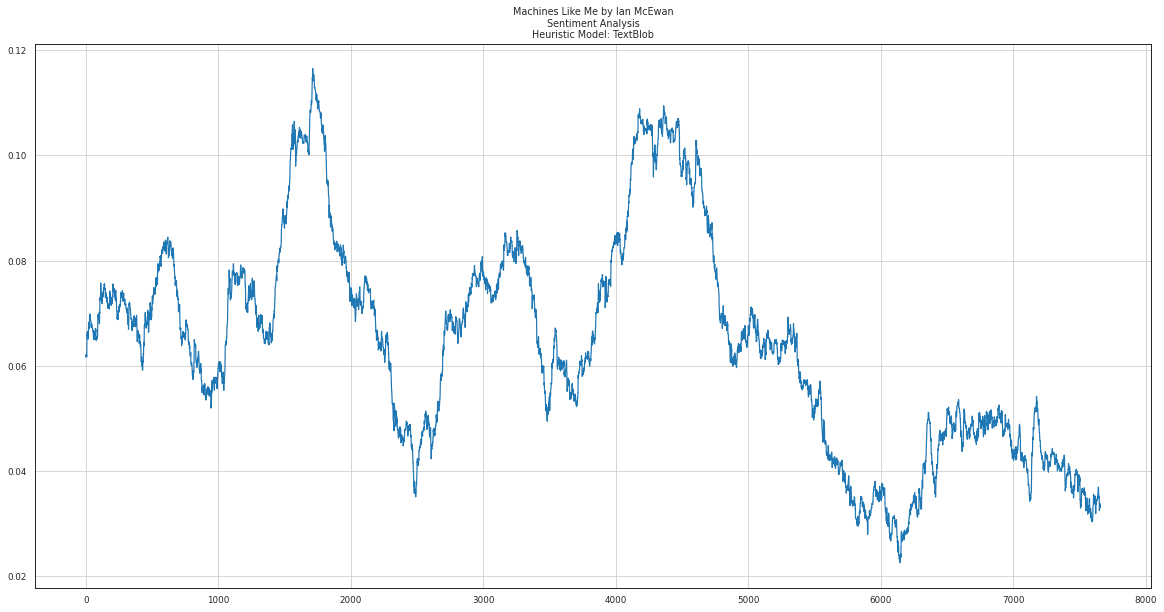

In [79]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

#### **Save Checkpoint**

In [80]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

/gdrive/MyDrive/sentimentarcs_notebooks


SUBDIR_SENTIMENT_RAW: sentiment_raw_novels_new_corpus3/


Existing Sentiment Datafiles in Destination Subdir:

sentiment_raw_novels_new_corpus3_all_1heu.json
sentiment_raw_novels_new_corpus3_all_7lex.json


In [81]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Corpus_Genre: novels
        Corpus_Type: new
      Corpus_Number: 3

These Text Titles:



dict_keys(['imcewan_machineslikeme'])

In [82]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_1emb.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_1emb.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

Saving to:
  sentiment_raw_novels_new_corpus3_all_1emb.json
Writing to subdir:
  ./sentiment_raw/sentiment_raw_novels_new_corpus3/
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus3/sentiment_raw_novels_new_corpus3_all_1emb.json


In [83]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

total 11762
-rw------- 1 root root 3783384 Apr 22 09:26 sentiment_raw_novels_new_corpus3_all_7lex.json
-rw------- 1 root root 4006294 Apr 22 09:27 sentiment_raw_novels_new_corpus3_all_1heu.json
-rw------- 1 root root 4253375 Apr 22 09:29 sentiment_raw_novels_new_corpus3_all_1emb.json


In [84]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=subdir_path)
test_dt.keys()
print('\n')
test_dt[corpus_texts_ls[0]].info()

dict_keys(['imcewan_machineslikeme'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   afinn                       7657 non-null   float64
 1   pysentimentr_huliu          7657 non-null   float64
 2   pysentimentr_jockersrinker  7657 non-null   float64
 3   pysentimentr_lmcd           7657 non-null   float64
 4   pysentimentr_nrc            7657 non-null   float64
 5   pysentimentr_senticnet      7657 non-null   float64
 6   pysentimentr_sentiword      7657 non-null   float64
 7   text_clean                  7657 non-null   object 
 8   text_raw                    7657 non-null   object 
 9   textblob                    7657 non-null   float64
 10  vader                       7657 non-null   float64
dtypes: float64(9), object(2)
memory usage: 658.1+ KB


## **Linguistic Models**

### **Pattern**

In [85]:
!pip install pattern

     |████████████████████████████████| 22.2 MB 1.5 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 81 kB 10.0 MB/s 
     |████████████████████████████████| 5.6 MB 27.6 MB/s 
     |████████████████████████████████| 5.6 MB 19.3 MB/s 
     |████████████████████████████████| 419 kB 46.9 MB/s 
     |████████████████████████████████| 104 kB 58.0 MB/s 
     |████████████████████████████████| 3.6 MB 33.5 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=882dd8613093616d676f4a926babbf7df7722ff33c5e293e9a5b2434b31ab2c0
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.0-cp37-cp37m-linux_x86_64.whl size=99968 sha256=dcd35f5297df396b8d601077802daed6cddfa154f16cb1bbe49833b67180abf2
  Stored in directory: /root/.cache/pip/wheels/97/d4/df/08cd6e1fa4a8691b268ab254bd0fa589827ab5b65638c010b4
 

In [86]:
from pattern.en import sentiment, polarity, subjectivity, positive

lexicon_name = 'Pattern'
lexicon_dense = ''.join(lexicon_name.split('_'))
lexicon_df = pd.DataFrame()

model_name = 'pattern'
model_type = 'Linguistic'

# Sentiment analysis (or opinion mining) attempts to determine if
# a text is objective or subjective, positive or negative.
# The sentiment analysis lexicon bundled in Pattern focuses on adjectives.
# It contains adjectives that occur frequently in customer reviews,
# hand-tagged with values for polarity and subjectivity.

# The polarity() function measures positive vs. negative, as a number between -1.0 and +1.0.
# The subjectivity() function measures objective vs. subjective, as a number between 0.0 and 1.0.
# The sentiment() function returns an averaged (polarity, subjectivity)-tuple for a given string.
for word in ("amazing", "horrible", "public"):
    print(word, sentiment(word))

print("")
print(sentiment(
    "The movie attempts to be surreal by incorporating time travel and various time paradoxes,"
    "but it's presented in such a ridiculous way it's seriously boring."))


amazing (0.6000000000000001, 0.9)
horrible (-1.0, 1.0)
public (0.0, 0.06666666666666667)

(-0.21666666666666665, 0.8)


In [87]:
# Test Words
print(f'Testing {lexicon_name} lexicon for WORDS Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # print(f'Looking up VADER sentiment for {aword_str}')
  word_sentiment_fl = polarity(aword_str.lower())
  print(f'[{word_sentiment_fl: ^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting {lexicon_name} lexicon for SENTENCES Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = polarity(asent_str)
  print(f'[{sent_sentiment_fl: ^8.3f}]: {asent_str}\n')


Testing Pattern lexicon for WORDS Sentiment
--------------------------------------------------
[ 0.500  ]: Love

[ -0.800 ]: Hate

[ 0.400  ]: bizarre

[ -0.050 ]: strange

[ 0.000  ]: furious

[ 0.000  ]: elated

[ -0.100 ]: curious

[ 0.000  ]: beserk

[ 0.000  ]: gambaro


Testing Pattern lexicon for SENTENCES Sentiment
--------------------------------------------------
[ -0.825 ]: I hate bad evil worthless Mondays.

[ 0.500  ]: I love Paris in the springtime

[ 0.000  ]: It was Wednesday.

[ -0.900 ]: You are a disgusting pig - I hate you.

[ 0.600  ]: What a delightfully funny and beautiful good man.

[ 0.000  ]: That was it



In [88]:
# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: polarity(x.lower()))

Processing #0: imcewan_machineslikeme


In [89]:
corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  pysentimentr_lmcd  afinn  \
0                0.416667                   3.690               -1.0    1.0   
1                0.375000                   3.742                0.0    3.0   
2                0.050000                   1.389                0.0    2.0   
3                0.375000                   0.738                0.0    0.0   
4               -1.104167                   0.836                0.0    2.0   

    vader  textblob   pattern  
0  0.3182 -0.263636 -0.131818  
1  0.8016  0.000000  0.000000  
2  0.6369  0.860000  0.215000  
3  0.1059  0.000000  0.000000  
4  0.5719  1.000000  1.000000

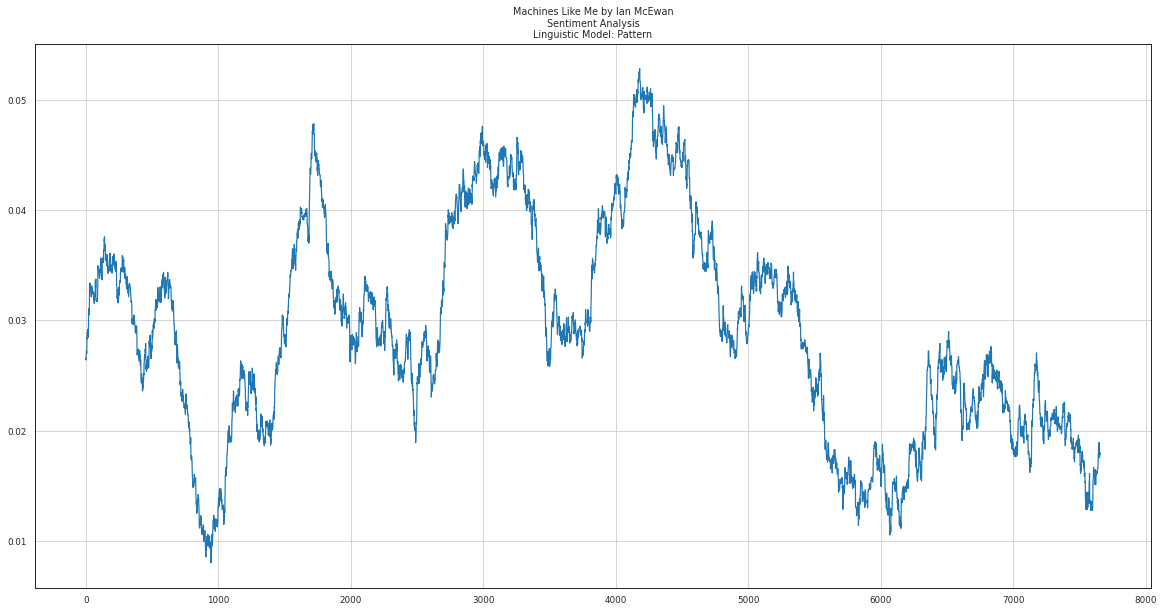

In [90]:
# Verfiy Plausible Sentiment Values via Plot

text_indx = 0

text_title_str = corpus_texts_ls[text_indx]
# lexicon_name = 'jockers_rinker'
lexicon_dense = ''.join(lexicon_name.split('_'))

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{global_vars.corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {lexicon_name}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.grid(True)
plt.show();

#### **Save Checkpoint**

In [91]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

/gdrive/MyDrive/sentimentarcs_notebooks


SUBDIR_SENTIMENT_RAW: sentiment_raw_novels_new_corpus3/


Existing Sentiment Datafiles in Destination Subdir:

sentiment_raw_novels_new_corpus3_all_1emb.json
sentiment_raw_novels_new_corpus3_all_1heu.json
sentiment_raw_novels_new_corpus3_all_7lex.json


In [92]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Corpus_Genre: novels
        Corpus_Type: new
      Corpus_Number: 3

These Text Titles:



dict_keys(['imcewan_machineslikeme'])

In [93]:
# Save sentiment values to subdir_sentiments

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_1ling.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_1ling.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

Saving to:
  sentiment_raw_novels_new_corpus3_all_1ling.json
Writing to subdir:
  ./sentiment_raw/sentiment_raw_novels_new_corpus3/
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus3/sentiment_raw_novels_new_corpus3_all_1ling.json


In [94]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

total 16153
-rw------- 1 root root 3783384 Apr 22 09:26 sentiment_raw_novels_new_corpus3_all_7lex.json
-rw------- 1 root root 4006294 Apr 22 09:27 sentiment_raw_novels_new_corpus3_all_1heu.json
-rw------- 1 root root 4253375 Apr 22 09:29 sentiment_raw_novels_new_corpus3_all_1emb.json
-rw------- 1 root root 4496067 Apr 22 09:31 sentiment_raw_novels_new_corpus3_all_1ling.json


In [95]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=subdir_path)
test_dt.keys()
print('\n')
test_dt[corpus_texts_ls[0]].info()

dict_keys(['imcewan_machineslikeme'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   afinn                       7657 non-null   float64
 1   pattern                     7657 non-null   float64
 2   pysentimentr_huliu          7657 non-null   float64
 3   pysentimentr_jockersrinker  7657 non-null   float64
 4   pysentimentr_lmcd           7657 non-null   float64
 5   pysentimentr_nrc            7657 non-null   float64
 6   pysentimentr_senticnet      7657 non-null   float64
 7   pysentimentr_sentiword      7657 non-null   float64
 8   text_clean                  7657 non-null   object 
 9   text_raw                    7657 non-null   object 
 10  textblob                    7657 non-null   float64
 11  vader                       7657 non-null   float64
dtypes: float64(10), object(2)
memory usage: 718.0+ KB


## **Prepare Training Dataset**


### **Load Libraries**

In [96]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### **Get 50k IMDB Dataset**


#### **Option(a): Get from Stanford (slow ~15mins, no login)**

In [ ]:
%%time

# NOTE:    12m47s @02:40 on 20220421 Colab Pro CPU

# https://gdcoder.com/sentiment-clas/

# chdir to data subdir
os.chdir(f'{Path_to_SentimentArcs}/data')

!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!gunzip aclImdb_v1.tar.gz
!tar -xvf aclImdb_v1.tar

# delete left over *.tar file (284.4M)
!rm aclImdb_v1.tar

# chdir back to SentimentArcs root project folder
os.chdir(Path_to_SentimentArcs)

In [ ]:
# Explore downloaded/unzipped IMDB raw text files

PATH_ACLIMDB='data/aclImdb/'
names = ['neg','pos']
!ls {PATH_ACLIMDB}
!ls {PATH_ACLIMDB}train
!ls {PATH_ACLIMDB}train/pos | head

#Similar for the test folder
!ls {PATH_ACLIMDB}test
!ls {PATH_ACLIMDB}test/pos | head

In [ ]:
!pwd

In [ ]:
!ls -altr

In [ ]:
!ls data

In [ ]:
temp_str = f'./{PATH_ACLIMDB}train'
temp_str

In [ ]:
PATH_ACLIMDB = 'aclImdb/'

In [ ]:
!ls $PATH_ACLIMDB

In [ ]:
temp_str = f'./{PATH_ACLIMDB}train'
!ls $temp_str

In [ ]:
%%time

# NOTE:  1m31 @02:47 on 20220421 Colab Pro

# Load text from files

def load_texts_labels_from_folders(path, folders):
    texts,labels = [],[]
    for idx,label in enumerate(folders):
        for fname in glob(os.path.join(path, label, '*.*')):
            texts.append(open(fname, 'r').read())
            labels.append(idx)
    # stored as np.int8 to save space 
    return texts, np.array(labels).astype(np.int8)

train_x,train_y = load_texts_labels_from_folders(f'{PATH_ACLIMDB}train',names)
test_x,test_y = load_texts_labels_from_folders(f'{PATH_ACLIMDB}test',names)

len(train_x),len(train_y),len(test_x),len(test_y)

len(train_y[train_y==1]),len(test_y[test_y==1])

np.unique(train_y)

In [ ]:
# View sample IDBM file

print(train_x[0])
print()
print(f"Review's label: {train_y[0]}")
# 0 represent a negative review

In [ ]:
len(train_x + test_x)

In [ ]:
len(test_y)

In [ ]:
len(all_y)

In [ ]:
all_x = train_x + test_x
print(f'len(all_x): {len(all_x)}')
all_y = train_y + test_y
print(f'len(all_y): {len(all_y)}')

imdb_df = pd.DataFrame({'review':all_x, 'sentiment':all_y})
imdb_df['review'] = imdb_df['review'].astype('string')
imdb_df.head()
imdb_df.info()

#### **Option(b): Get from Kaggle (immediate, login)**

In [99]:
# https://www.kaggle.com/code/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert/notebook

!pwd

/gdrive/MyDrive/sentimentarcs_notebooks


In [100]:
# Upload Kaggle API Authorization Tokens (kaggle.json file)

os.chdir(f'{Path_to_SentimentArcs}/data')

# create hidden directory
!mkdir ~/.kaggle

from google.colab import files
uploaded = files.upload()

!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

os.chdir(Path_to_SentimentArcs)

Saving kaggle.json to kaggle.json


In [101]:
# Get IMDB dataset

os.chdir(f'{Path_to_SentimentArcs}/data')

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# SECURITY: delete kaggle.json file with private credentials each time
!rm -rf ~/.kaggle

os.chdir(Path_to_SentimentArcs)

 19% 5.00M/25.7M [00:00<00:00, 32.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 105MB/s] 


In [103]:
# SECURITY: Ensure hidden kaggle subdir with kaggle.json credential file is deleted

!ls ~/.kaggle

# EXPECT OUTPUT: 'ls: cannot access '/root/.kaggle': No such file or directory'

ls: cannot access '/root/.kaggle': No such file or directory


In [104]:
# Unzip datafile
 
os.chdir(f'{Path_to_SentimentArcs}/data')

!unzip imdb-dataset-of-50k-movie-reviews.zip 
!mv IMDB\ Dataset.csv imdb_dataset.csv

os.chdir(Path_to_SentimentArcs)

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [105]:
# read IMDB dataset

imdb_df=pd.read_csv('./data/imdb_dataset.csv')
imdb_df['review'] = imdb_df['review'].astype('string')
imdb_df.head()
imdb_df.info()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  string
 1   sentiment  50000 non-null  object
dtypes: object(1), string(1)
memory usage: 781.4+ KB


### **Remove Nulls and Duplicate Rows**

In [107]:
# Summary Statistics

imdb_df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [108]:
# Null Values

null_values = imdb_df.isnull().sum() #identifying missing values
null_values

null_values.index[0]
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))

review       0
sentiment    0
dtype: int64

'review'

There are 0 missing values for review and 0 missing values for sentiment.


In [109]:
# Duplicate Values

num_duplicates = imdb_df.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

#view duplicate reviews
review = imdb_df['review']
duplicated_review = imdb_df[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head()

#drop duplicate reviews
imdb_df.drop_duplicates(inplace = True)

print('The dataset contains {} rows and {} columns after removing duplicates'.format(imdb_df.shape[0],imdb_df.shape[1]))

There are 418 duplicate reviews present in the dataset


review sentiment
34058  "Go Fish" garnered Rose Troche rightly or wron...  negative
47467  "Go Fish" garnered Rose Troche rightly or wron...  negative
29956  "Three" is a seriously dumb shipwreck movie. M...  negative
31488  "Three" is a seriously dumb shipwreck movie. M...  negative
47527  "Witchery" might just be the most incoherent a...  negative

The dataset contains 49582 rows and 2 columns after removing duplicates


In [ ]:
# Bootstrap for Unbalanced Sentiment Classes

"""
# IMDB is balanced 25k/25k so no need to adjust

train, test = train_test_split(df_training, test_size=0.3, random_state=1)t_1 = train[train['sentiment']==1].sample(800,replace=True)
t_2 = train[train['sentiment']==2].sample(800,replace=True)
t_3 = train[train['sentiment']==0].sample(800,replace=True)
training_bs = pd.concat([t_1, t_2, t_3])print train.shape
print training_bs.shape
print test.shape# sanity check 
df_training.shape[0] == (train.shape[0] + test.shape[0])
""";

### **Text Preprocessing**

In [110]:
# Get Stopwords

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop = stopwords.words('english')
wl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [111]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [112]:
#function to clean data

def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [113]:
imdb_copy_df = imdb_df.copy()

In [114]:
%%time

# NOTE: 

# Clean Text and Numerically encode sentiment

imdb_df['review']=imdb_df['review'].apply(clean_text,lemmatize = True)

#converting target variable to numeric labels
imdb_df.sentiment = [ 1 if each == "positive" else 0 for each in imdb_df.sentiment]

#after converting labels
imdb_df.head()

review  sentiment
0  one reviewer mentioned watching oz episode hoo...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
3  basically family little boy jake think zombie ...          0
4  petter matteis love time money visually stunni...          1

### **EDA**

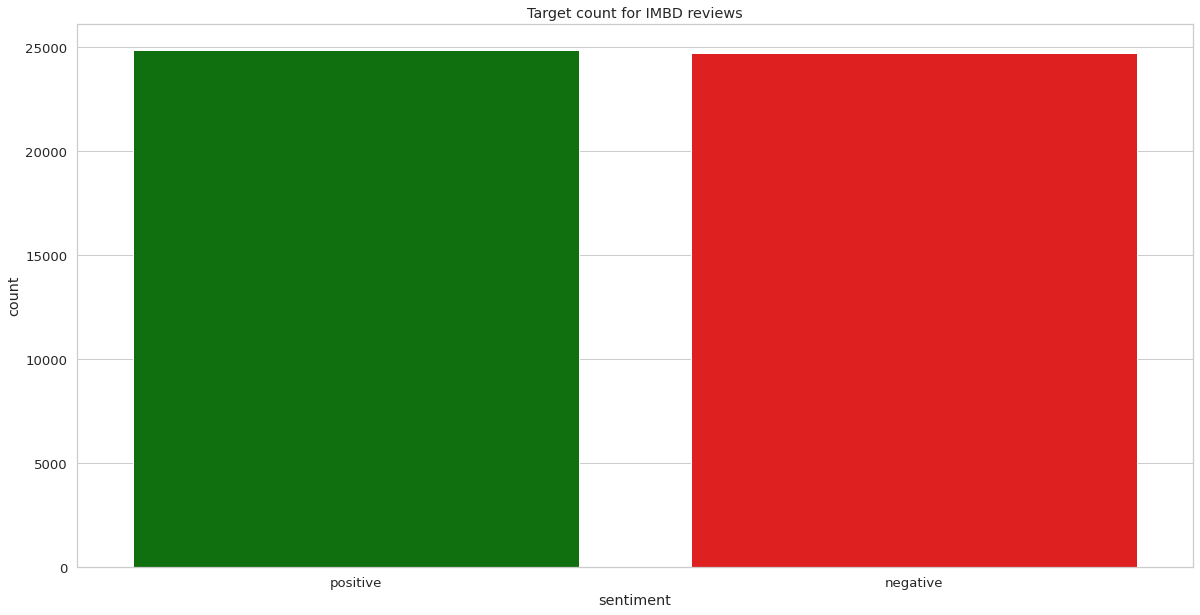

Positive reviews are 24698 i.e. 49.81 % of the dataset
Negative reviews are 24884 i.e. 50.19 % of the dataset


In [115]:
# Check for Imbalanced Data with Count Plot

sns.set(style = "whitegrid" , font_scale = 1.2)
_ = sns.countplot(imdb_df.sentiment,palette = ['green','red'],order = [1,0])
_ = plt.xticks(ticks = np.arange(2),labels = ['positive','negative'])
_ = plt.title('Target count for IMBD reviews')
plt.show()

# Print Summary 
print('Positive reviews are', (round(imdb_df['sentiment'].value_counts()[0])),'i.e.', round(imdb_df['sentiment'].value_counts()[0]/len(imdb_df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(imdb_df['sentiment'].value_counts()[1])),'i.e.',round(imdb_df['sentiment'].value_counts()[1]/len(imdb_df) * 100,2), '% of the dataset')

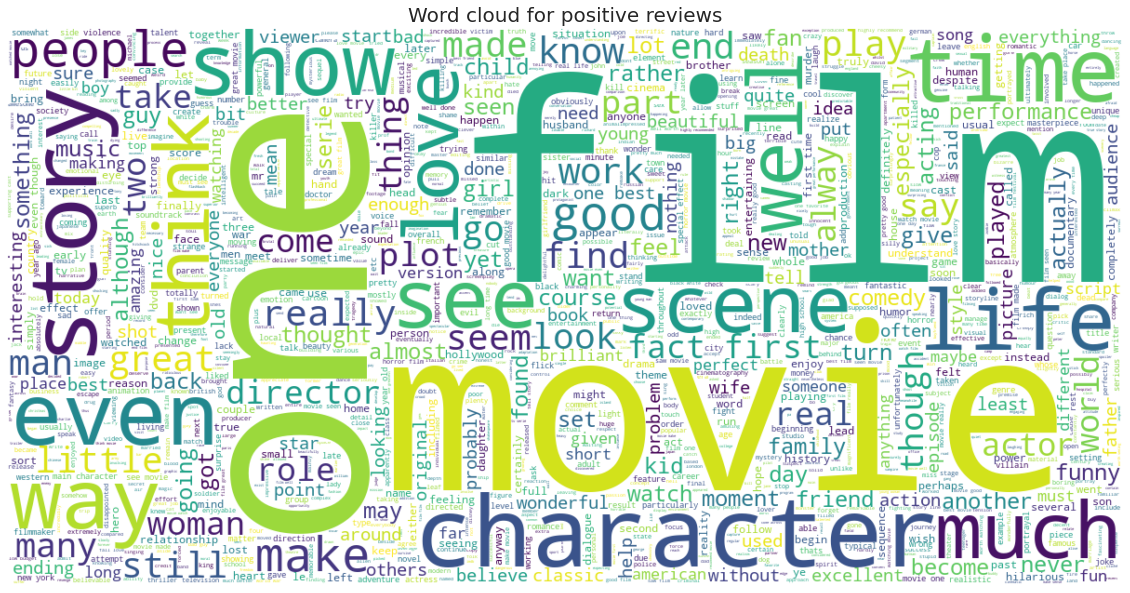

CPU times: user 43 s, sys: 1.78 s, total: 44.7 s
Wall time: 50.5 s


In [116]:
%%time

# NOTE: 1m05s @04:06 on 20220421 Colab CPU

# Word Cloud for positive reviews

positive_data = imdb_df[imdb_df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
_ = plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

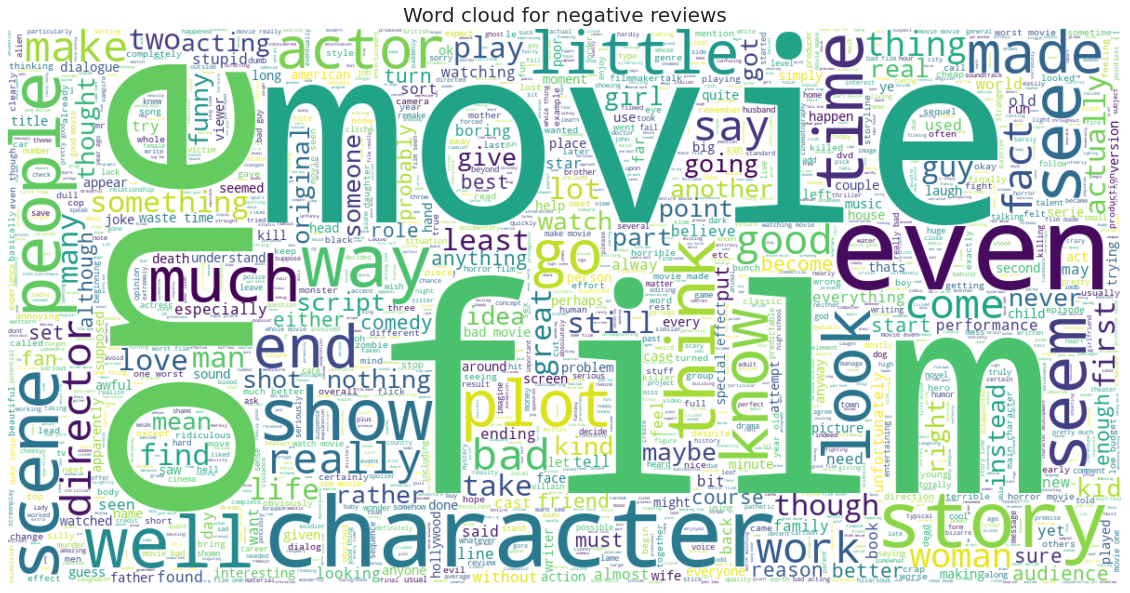

CPU times: user 34.5 s, sys: 2.37 s, total: 36.8 s
Wall time: 40.6 s


In [117]:
%%time

# NOTE: 1m05s @04:06 on 20220421 Colab CPU

# Word Cloud for negative reviews

negative_data = imdb_df[imdb_df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
_ = plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

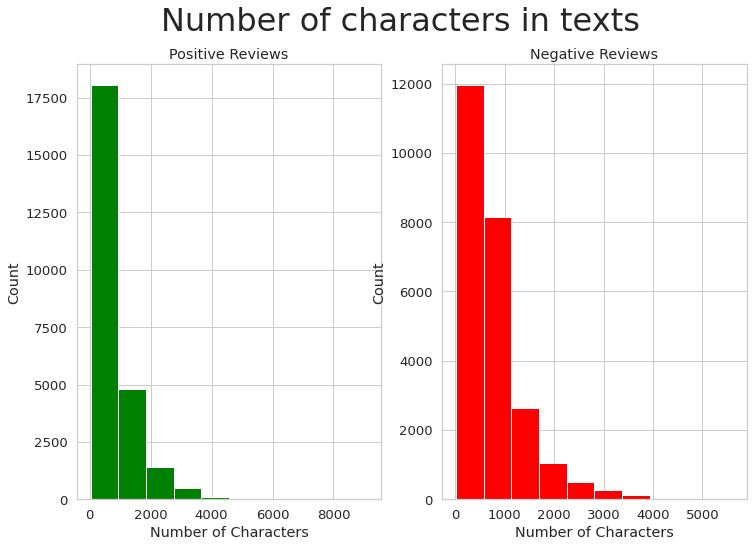

In [118]:
# Character Counts per Review Type

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
_ = ax1.hist(text_len,color='green')
_ = ax1.set_title('Positive Reviews')
_ = ax1.set_xlabel('Number of Characters')
_ = ax1.set_ylabel('Count')
text_len=negative_data.str.len()
_ = ax2.hist(text_len,color='red')
_ = ax2.set_title('Negative Reviews')
_ = ax2.set_xlabel('Number of Characters')
_ = ax2.set_ylabel('Count')
_ = fig.suptitle('Number of characters in texts')
plt.show()


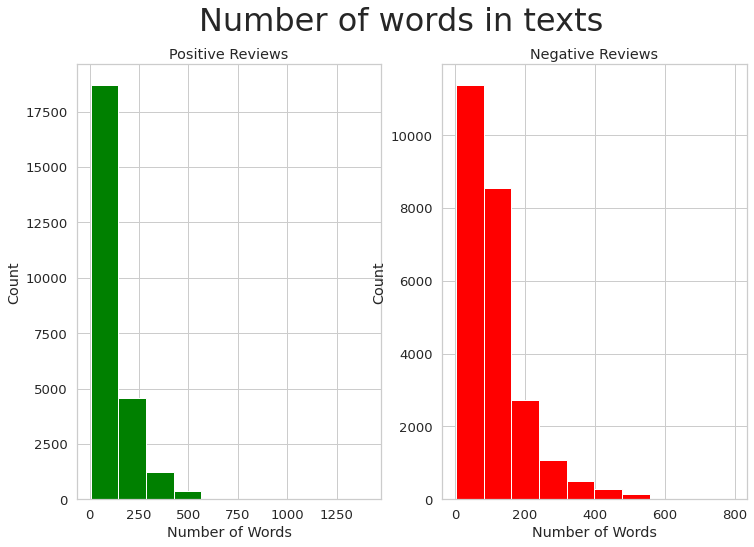

In [119]:
# Word Count per Review Type

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
_ = ax1.hist(text_len,color='green')
_ = ax1.set_title('Positive Reviews')
_ = ax1.set_xlabel('Number of Words')
_ = ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
_ = ax2.hist(text_len,color='red')
_ = ax2.set_title('Negative Reviews')
_ = ax2.set_xlabel('Number of Words')
_ = ax2.set_ylabel('Count')
_ = fig.suptitle('Number of words in texts')
_ = plt.show()

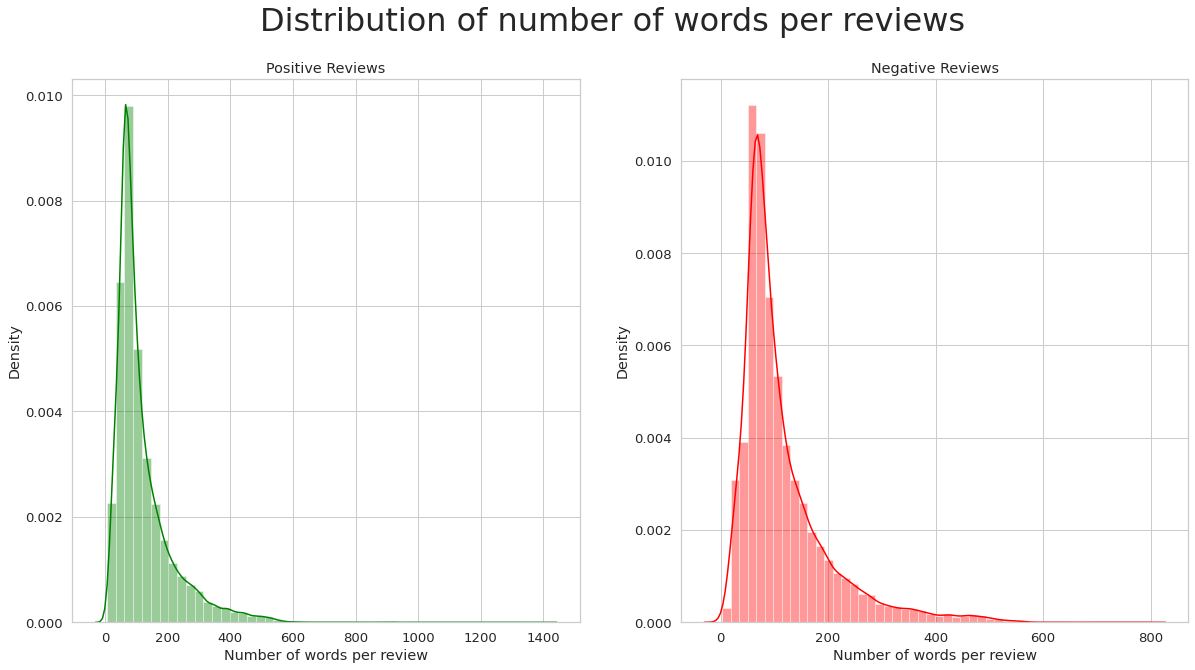

In [120]:
# Word Count Distribution per Review Type

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
_ = sns.distplot(word, ax=ax1,color='green')
_ = ax1.set_title('Positive Reviews')
_ = ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
_ = sns.distplot(word,ax=ax2,color='red')
_ = ax2.set_title('Negative Reviews')
_ = ax2.set_xlabel('Number of words per review')
_ = fig.suptitle('Distribution of number of words per reviews')
plt.show();

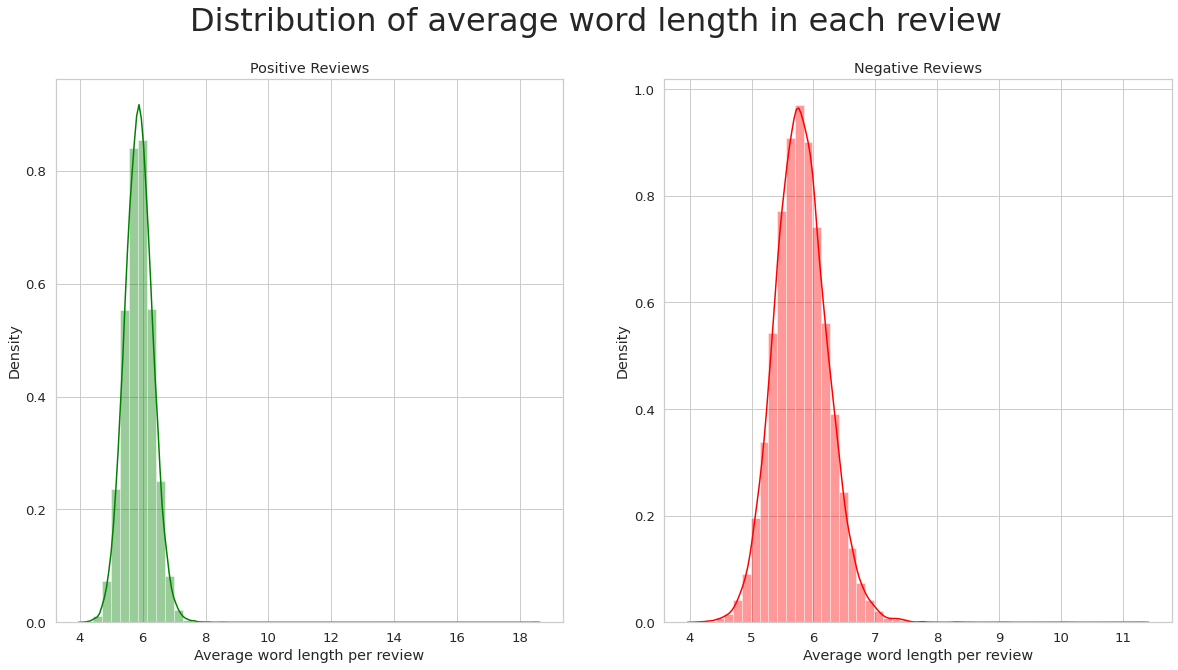

In [121]:
# Word Length Distribution per Review Type

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
_ = sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
_ = ax1.set_title('Positive Reviews')
_ = ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
_ = sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
_ = ax2.set_title('Negative Reviews')
_ = ax2.set_xlabel('Average word length per review')
_ = fig.suptitle('Distribution of average word length in each review')
plt.show();

In [122]:
# Get List of Corpus Vocab

def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(imdb_df.review)
corpus[:5]

['one', 'reviewer', 'mentioned', 'watching', 'oz']

In [123]:
from collections import Counter

In [124]:
# Get Word Freq

counter = Counter(corpus)

most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0      movie  100605
1       film   91130
2        one   53525
3       like   39746
4       time   30091
5      would   30037
6       good   28905
7  character   27801
8      story   24600
9       even   24440

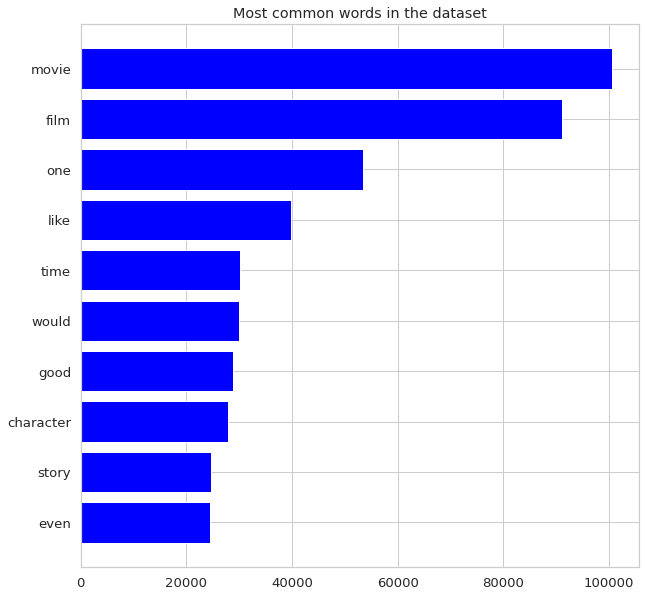

In [125]:
# Plot Most Common Words

most_common = most_common.sort_values('countv')

_ = plt.figure(figsize =(10,10))
_ = plt.yticks(range(len(most_common)), list(most_common.corpus))
_ = plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
_ = plt.title('Most common words in the dataset')
plt.show();


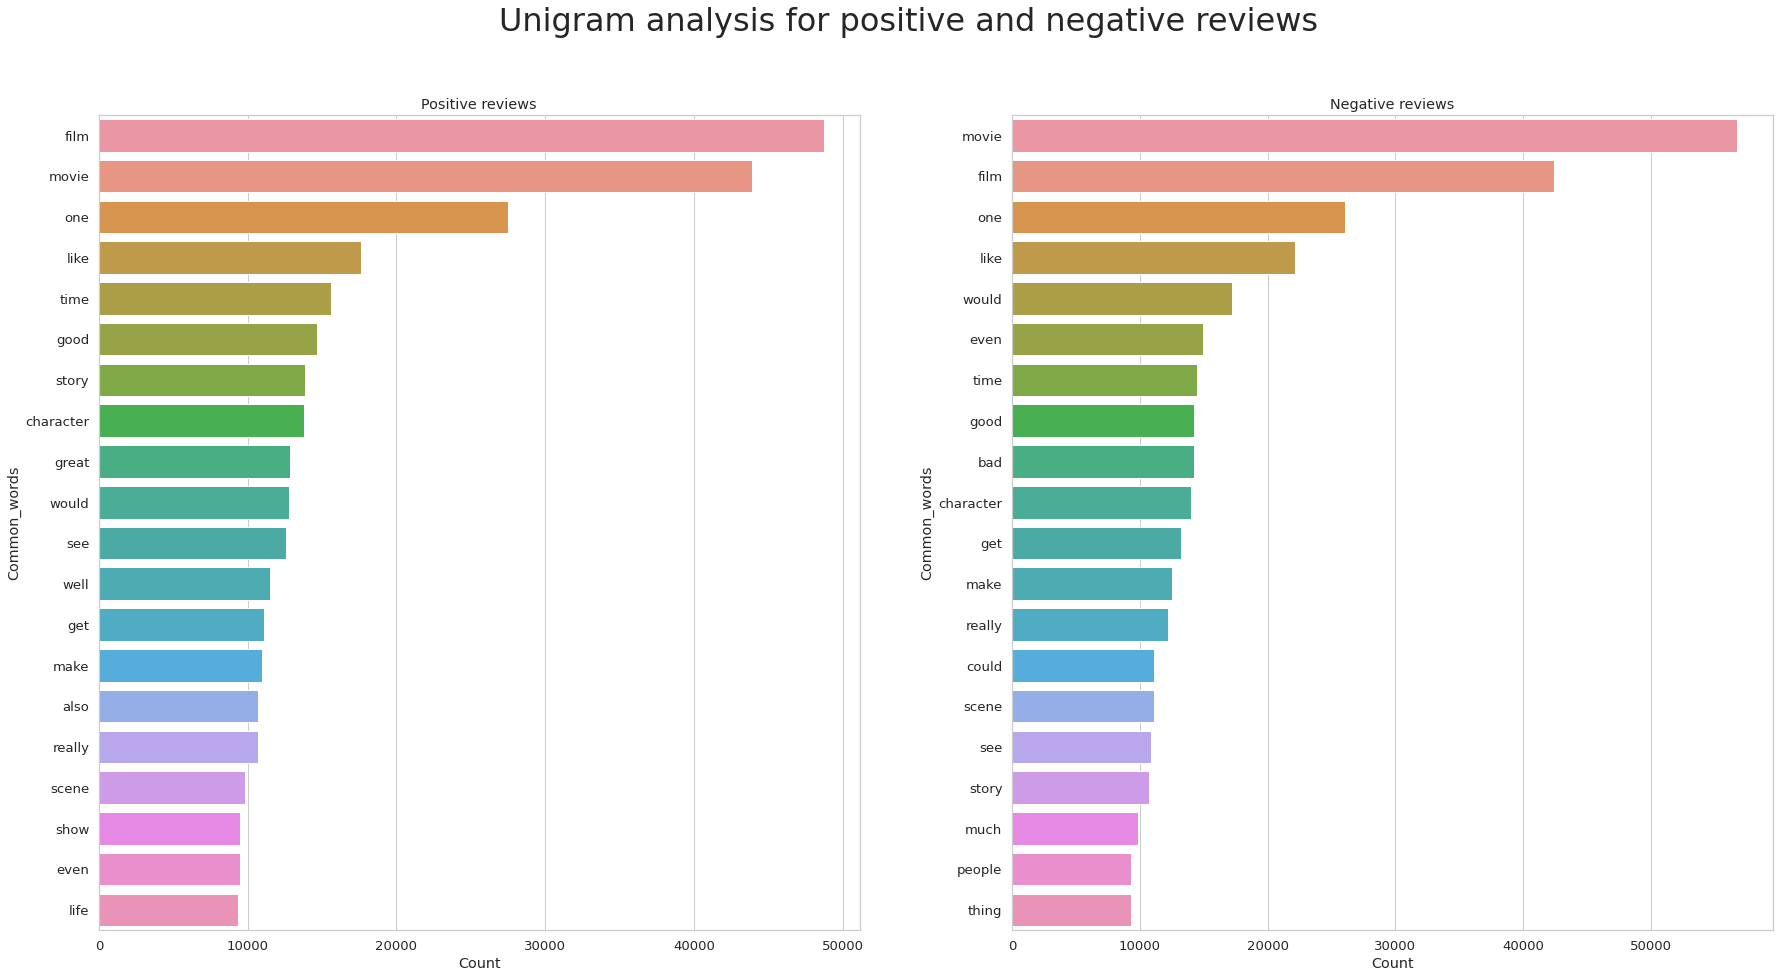

In [126]:
# Get nGrams

def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
_ = sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
_ = ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
_ = sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
_ = ax2.set_title('Negative reviews')
_ = fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show();

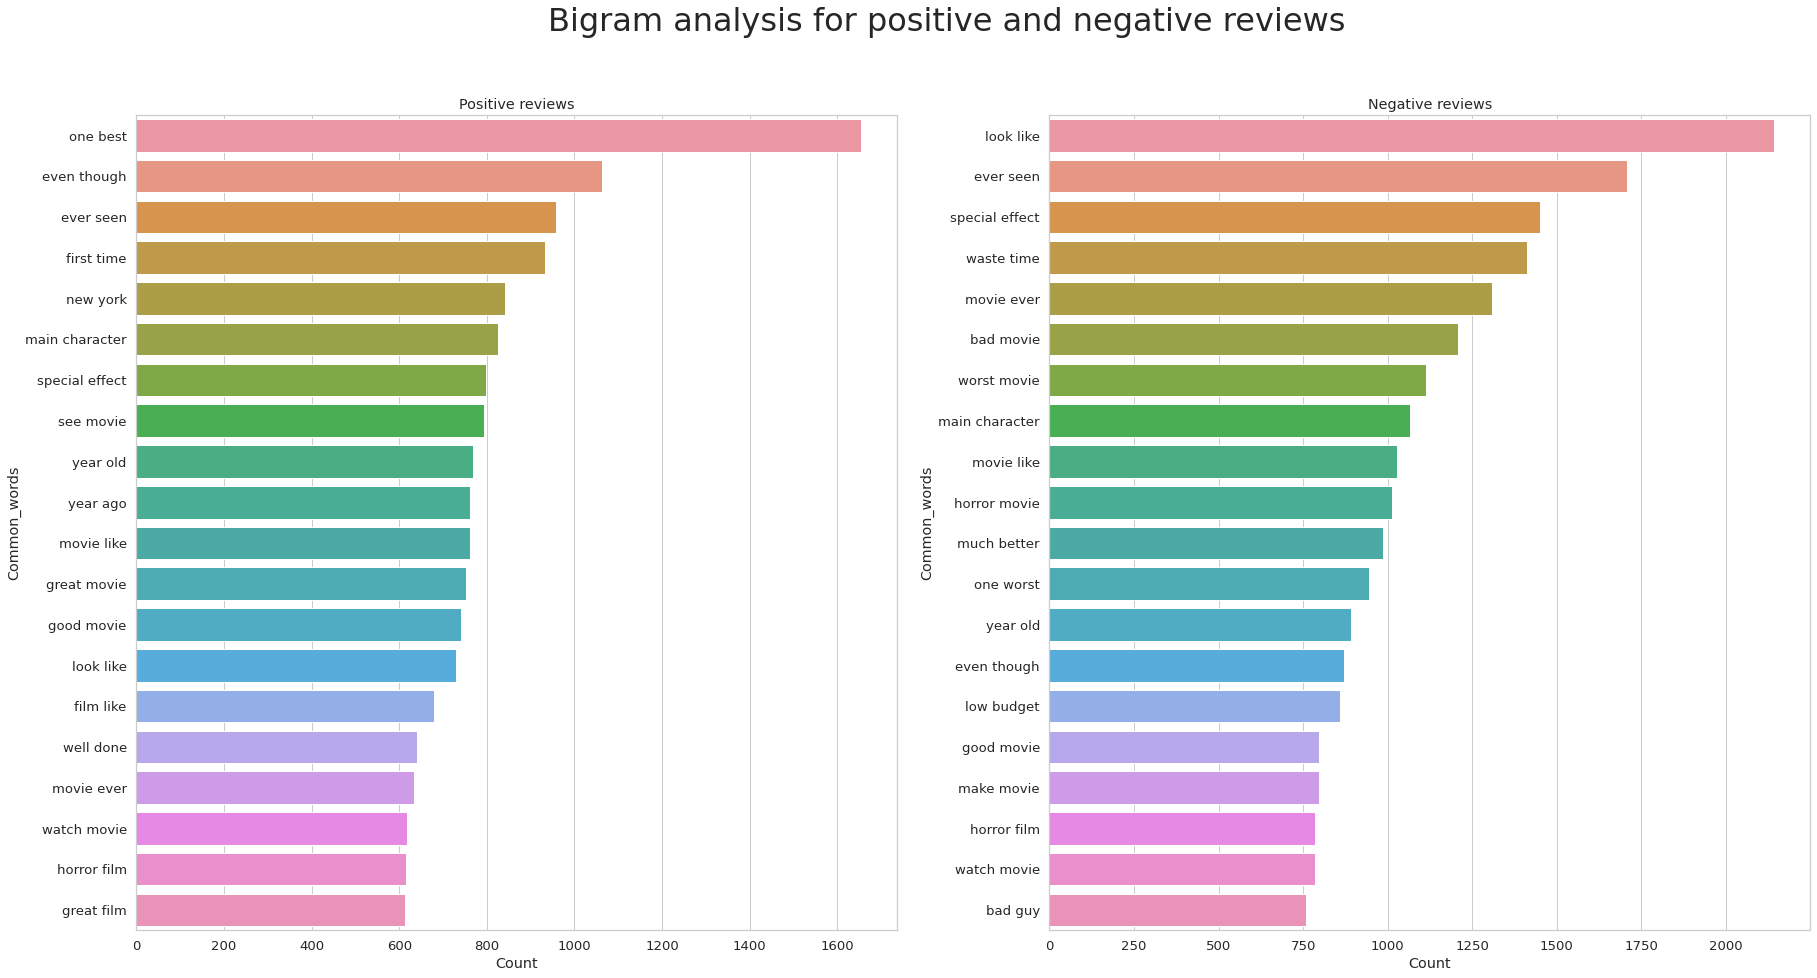

CPU times: user 43.8 s, sys: 867 ms, total: 44.7 s
Wall time: 48.1 s


In [127]:
%%time

# NOTE: 1m

# Bigrams

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
_ = sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
_ = ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
_ = sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
_ = ax2.set_title('Negative reviews')
_ = fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

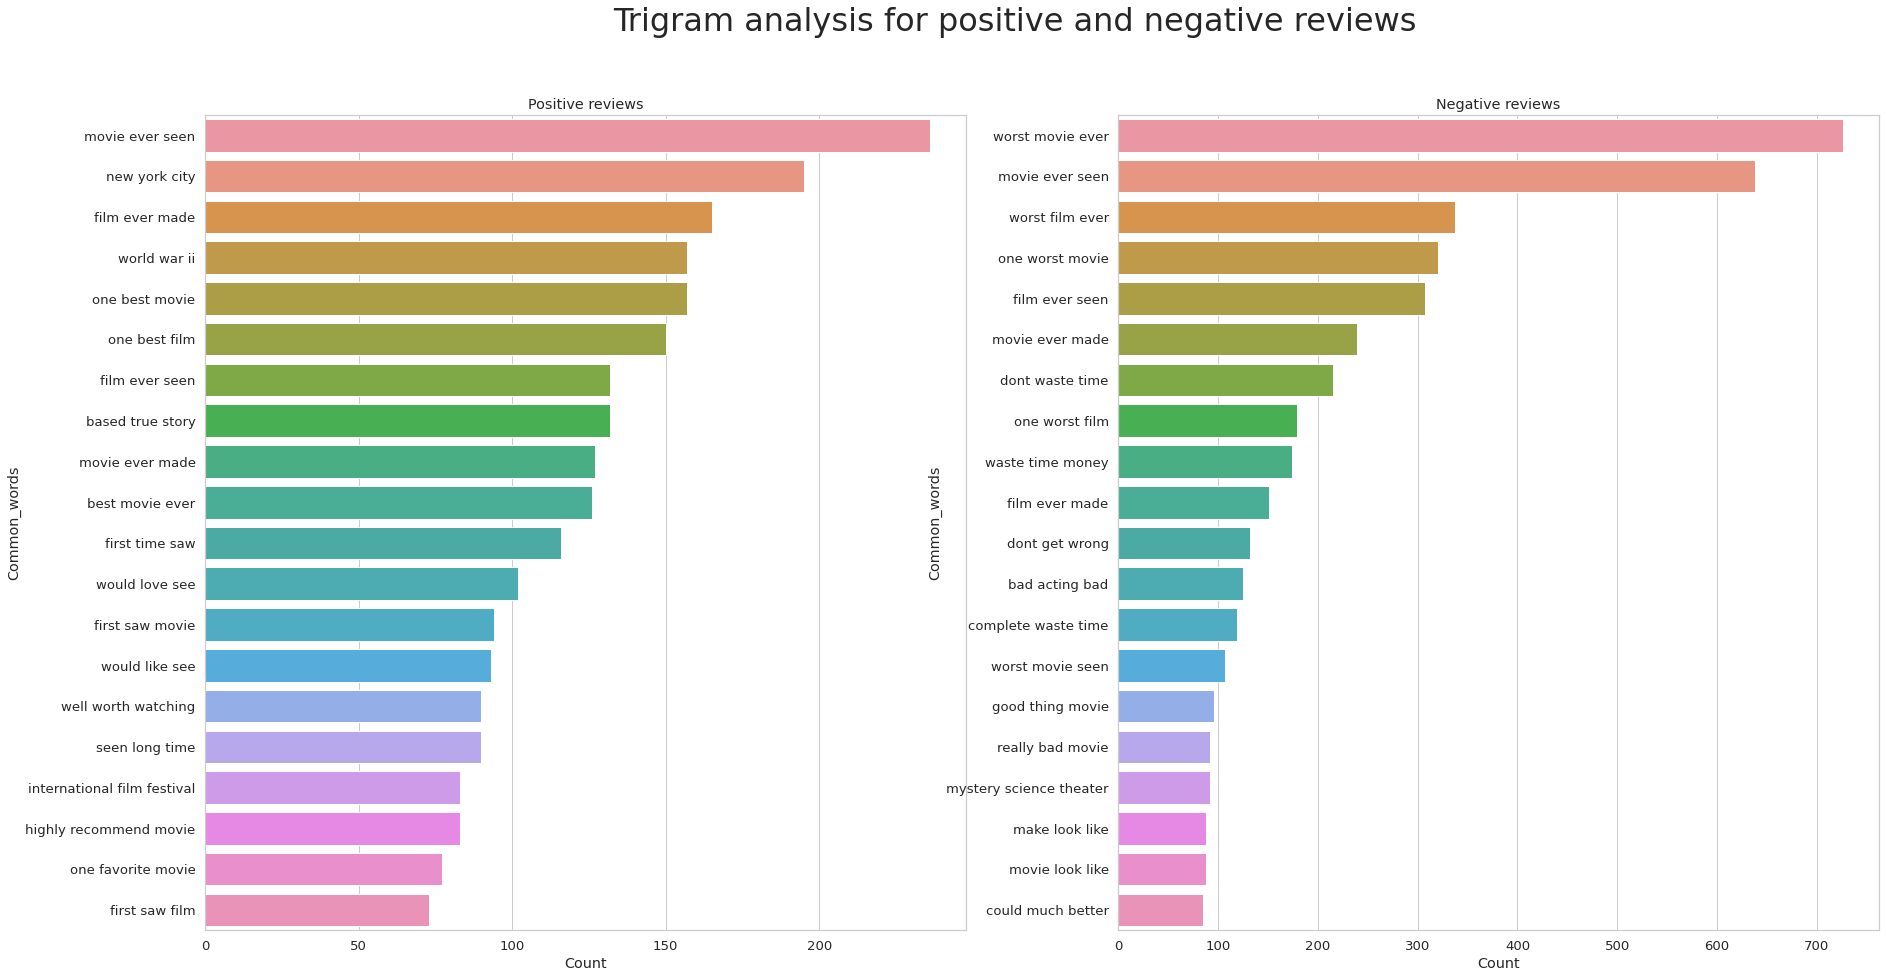

CPU times: user 52.9 s, sys: 1.11 s, total: 54 s
Wall time: 56.5 s


In [128]:
%%time

# NOTE: 55s

# Trigrams

_ = fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
_ = sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
_ = ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
_ = sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
_ = ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show();

### **Split & Vectorize Dataset (TF-IDF)**

In [139]:
#splitting into train and test

train, test= train_test_split(imdb_df, test_size=0.2, random_state=42)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

In [138]:
train.columns

Index(['review', 'sentiment'], dtype='object')

In [135]:
%%time

# NOTE: 19s

#Vectorizing data

# Vectorize Training dataset with TF-IDF
NGRAM_MAX = 3
FEATURES_MAX = 10000
# tfidf_vect = TfidfVectorizer() #tfidfVectorizer
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english') # + stopwords.words('french') # Extra stopwords step
vectorizer = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), stop_words=stopwords_en, max_features=FEATURES_MAX)

X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Count Vectorizer
count_vect = CountVectorizer() # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

### [SKIP]

### **(OLD) Vectorize with (a) TF-IDF or (b) BOW**



##### **Option (a) TF-IDF**

In [ ]:
  from nltk.corpus import stopwords
  stopwords_en = stopwords.words('english') # + stopwords.words('french')

In [ ]:
def tfidf_embeddings(df, text_clean_col='text_clean', label_col='polarity', ngrams=3, features=1000):
  '''
  Given a DataFrame and col name with clean text along with hyperparameters: max#ngrams and max#features
  Return DataFrame X with word embeddings and Series y.polarity
  '''

  # Hyperparamters

  NGRAM_MAX = ngrams
  FEATURES_MAX = features


  # Vectorize Training dataset with TF-IDF
  # NOTE: 1m11s
  vectorizer = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), stop_words=stopwords_en, max_features=FEATURES_MAX)

  # Select 'text_clean' or 'text_raw'
  embeddings = vectorizer.fit_transform(df[text_clean_col])  
  # embeddings = vectorizer.fit_transform(df.text_raw)

  emb_words_df = pd.DataFrame(embeddings.toarray(), columns=vectorizer.get_feature_names())
  # emb_words_df.head()

  # Split text features/vectorized samples from labels
  X = emb_words_df
  # y = df.polarity # sentiment
  if label_col == '':
    y = pd.Series([0]*df.shape[0])
  elif label_col == 'polarity':
    y = df[label_col] # sentiment
  else:
    print(f'ERROR: illegal value for label_col={label_col}')

  return X, y, vectorizer, embeddings

In [ ]:
%%time

# NOTE: 59s to 1m34s

X, y, vecs, embeds = tfidf_embeddings(training_df, text_clean_col='text_clean')

In [ ]:
X.shape
print('\n')
y.shape
type(y[0])

In [ ]:
# Hyperparamters

# NGRAM_MAX = 3
# FEATURES_MAX = 1000

In [ ]:
%%time

# Vectorize Training dataset with TF-IDF

# NOTE: 1m11s

"""
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english') # + stopwords.words('french')

vectorizer = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), stop_words=stopwords_en, max_features=FEATURES_MAX)

# Select 'text_clean' or 'text_raw'
embeddings = vectorizer.fit_transform(training_df.text_clean)  
# embeddings = vectorizer.fit_transform(training_df.text_raw)

emb_words_df = pd.DataFrame(embeddings.toarray(), columns=vectorizer.get_feature_names())
emb_words_df.head()
""";

In [ ]:
# Split text features/vectorized samples from labels

"""
X = emb_words_df
y = training_df.polarity # sentiment
X.shape
print('\n')
y.shape
type(y[0])
""";

##### **Option (b) BOW**

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(training_df['text_clean'])

In [ ]:
# Separate text from labels

X = words_df
y = training_df.sentiment
X.shape
print('\n')
y.shape
type(y[0])

## **Single ML Models**

### **Logistic Regression (logreg)**

In [ ]:
# X_train_count = count_vect.fit_transform(X_train)
# X_test_count = count_vect.transform(X_test)

In [192]:
#Creating a Pipeline
clf = Pipeline(steps =[
                       ('preprocessing', CountVectorizer()),
                       ('classifier', LogisticRegression(dual=False,max_iter=2000))
                       # ('classifier', LogisticRegression(C=1e9, solver='lbfgs', max_iter=10))
                       # ('classifier', LogisticRegression(C=1e9, solver='lbfgs', max_iter=2000))
                       # logreg = LogisticRegression(C=0.1, solver='sag')
                       ])
#Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=2000))])

In [193]:
# Calculation model Scores

# (C=1e9, solver='lbfgs', max_iter=10): 0.8722
# (dual=False,max_iter=2000):  0.8812
# (C=1e9, solver='lbfgs', max_iter=2000): 0.8651

# clf.score(X_valid, Y_valid)
clf.score(X_test,y_test)

0.8812140768377533

In [165]:
params = clf.get_params()
print(params)

print('\n')

clf.predict_proba

{'memory': None, 'steps': [('preprocessing', CountVectorizer()), ('classifier', LogisticRegression(max_iter=2000))], 'verbose': False, 'preprocessing': CountVectorizer(), 'classifier': LogisticRegression(max_iter=2000), 'preprocessing__analyzer': 'word', 'preprocessing__binary': False, 'preprocessing__decode_error': 'strict', 'preprocessing__dtype': <class 'numpy.int64'>, 'preprocessing__encoding': 'utf-8', 'preprocessing__input': 'content', 'preprocessing__lowercase': True, 'preprocessing__max_df': 1.0, 'preprocessing__max_features': None, 'preprocessing__min_df': 1, 'preprocessing__ngram_range': (1, 1), 'preprocessing__preprocessor': None, 'preprocessing__stop_words': None, 'preprocessing__strip_accents': None, 'preprocessing__token_pattern': '(?u)\\b\\w\\w+\\b', 'preprocessing__tokenizer': None, 'preprocessing__vocabulary': None, 'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, '

<function sklearn.pipeline.Pipeline.predict_proba>

In [194]:
sentiment_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Process #{i}: {atext}')

  preds_ls = clf.predict_proba(corpus_texts_dt[corpus_texts_ls[0]]['text_raw'])
  for prob_neg, prob_pos in preds_ls:
    # print(f'\nprob_neg: {prob_neg} vs prob_pos: {prob_pos}')
    sentiment_fl = prob_pos - prob_neg
    sentiment_ls.append(sentiment_fl)

  corpus_texts_dt[corpus_texts_ls[0]]['logreg'] = sentiment_ls
  # corpus_texts_dt[corpus_texts_ls[0]]['logreg'] = corpus_texts_dt[atext]['text_raw'].apply(lambda x : )

Process #0: imcewan_machineslikeme


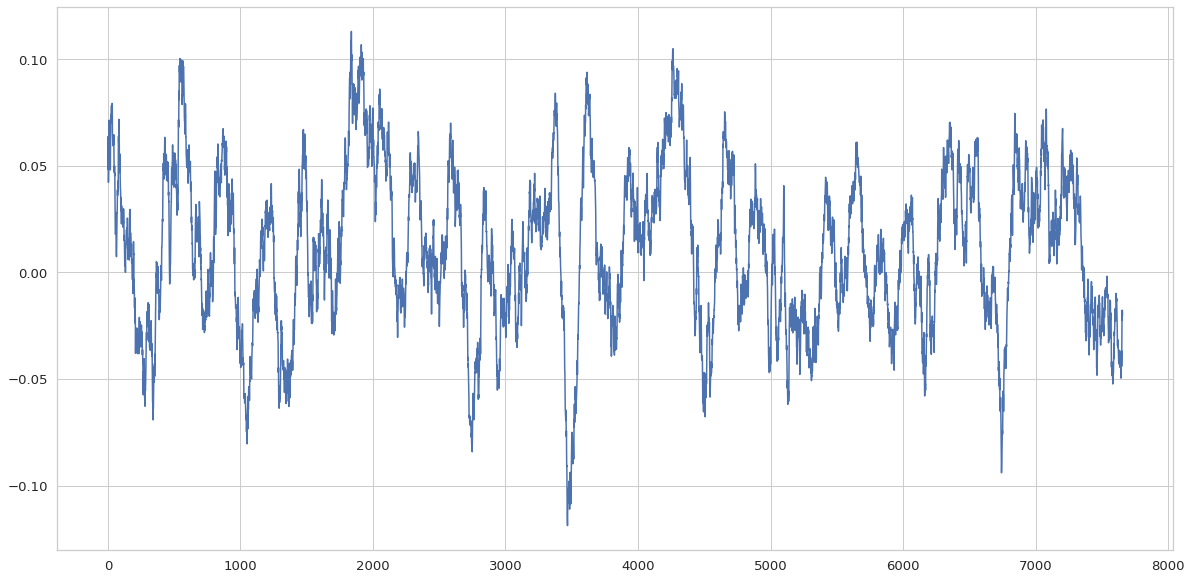

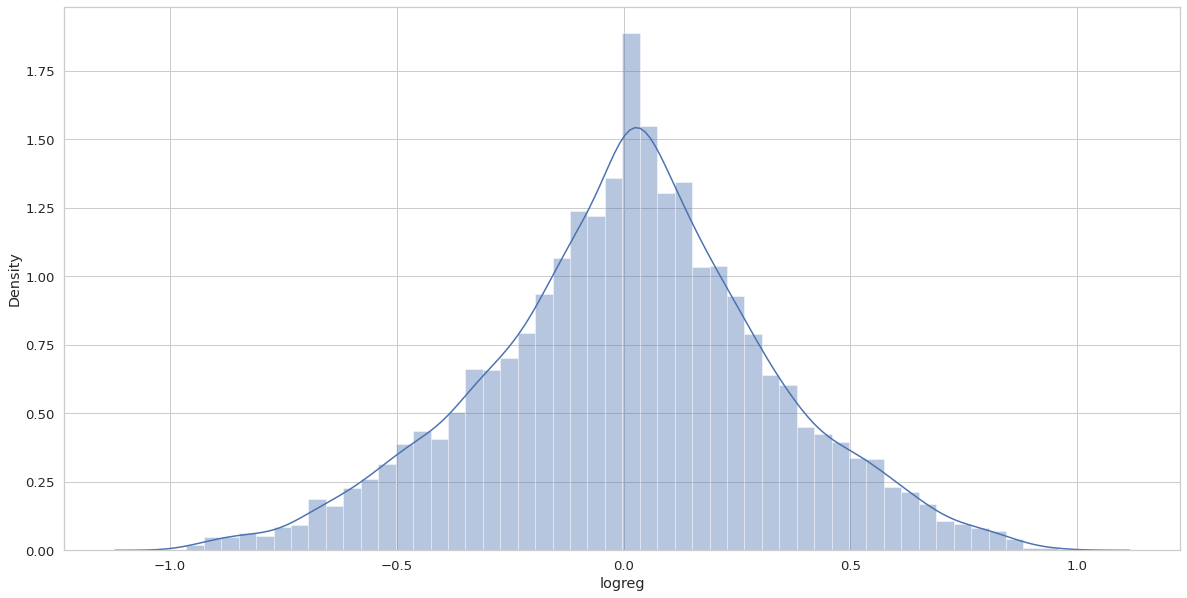

In [195]:
# Verify SMA Plot and Histogram

_= corpus_texts_dt[corpus_texts_ls[0]]['logreg'].rolling(100, center=True, min_periods=0).mean().plot()
plt.show()

sns.distplot(corpus_texts_dt[corpus_texts_ls[0]]['logreg'], kde=True)

In [196]:
# Verify

corpus_texts_dt[corpus_texts_ls[0]].head()

text_raw  \
0  But remember, please, the Law by which we live...   
1  It was religious yearning granted hope, it was...   
2  Our ambitions ran high and low--for a creation...   
3  As soon as it was feasible, we had no choice b...   
4  In loftiest terms, we aimed to escape our mort...   

                                          text_clean  \
0  but remember please the law by which we live w...   
1  it be religious yearn grant hope it be the hol...   
2  our ambition run high and low for a creation m...   
3  a soon a it be feasible we have no choice but ...   
4  in lofty term we aim to escape our mortality c...   

   pysentimentr_jockersrinker  pysentimentr_huliu  pysentimentr_nrc  \
0                        1.40                -1.0               1.0   
1                        1.25                 1.0               3.0   
2                        0.60                -1.0               2.0   
3                        1.15                 0.0               1.0   
4                       -0.85                 0.0              -1.0   

   pysentimentr_sentiword  pysentimentr_senticnet  pysentimentr_lmcd  afinn  \
0                0.416667                   3.690               -1.0    1.0   
1                0.375000                   3.742                0.0    3.0   
2                0.050000                   1.389                0.0    2.0   
3                0.375000                   0.738                0.0    0.0   
4               -1.104167                   0.836                0.0    2.0   

    vader  textblob   pattern    logreg  
0  0.3182 -0.263636 -0.131818  0.394550  
1  0.8016  0.000000  0.000000  0.003364  
2  0.6369  0.860000  0.215000  0.409511  
3  0.1059  0.000000  0.000000  0.554549  
4  0.5719  1.000000  1.000000  0.456550

### **Multinomial Naive Bayes (multinb)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [197]:
#Creating a Pipeline
clf = Pipeline(steps =[
                       ('preprocessing', CountVectorizer()),
                       ('classifier', MultinomialNB())
                       # ('classifier', LogisticRegression(C=1e9, solver='lbfgs', max_iter=10))
                       # ('classifier', LogisticRegression(C=1e9, solver='lbfgs', max_iter=2000))
                       ])
#Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [198]:
# Calculation model Scores

clf.score(X_test,y_test)

0.8590299485731572

In [199]:
sentiment_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Process #{i}: {atext}')

  preds_ls = clf.predict_proba(corpus_texts_dt[corpus_texts_ls[0]]['text_raw'])
  for prob_neg, prob_pos in preds_ls:
    # print(f'\nprob_neg: {prob_neg} vs prob_pos: {prob_pos}')
    sentiment_fl = prob_pos - prob_neg
    sentiment_ls.append(sentiment_fl)

  corpus_texts_dt[corpus_texts_ls[0]]['multinb'] = sentiment_ls
  # corpus_texts_dt[corpus_texts_ls[0]]['logreg'] = corpus_texts_dt[atext]['text_raw'].apply(lambda x : )

Process #0: imcewan_machineslikeme


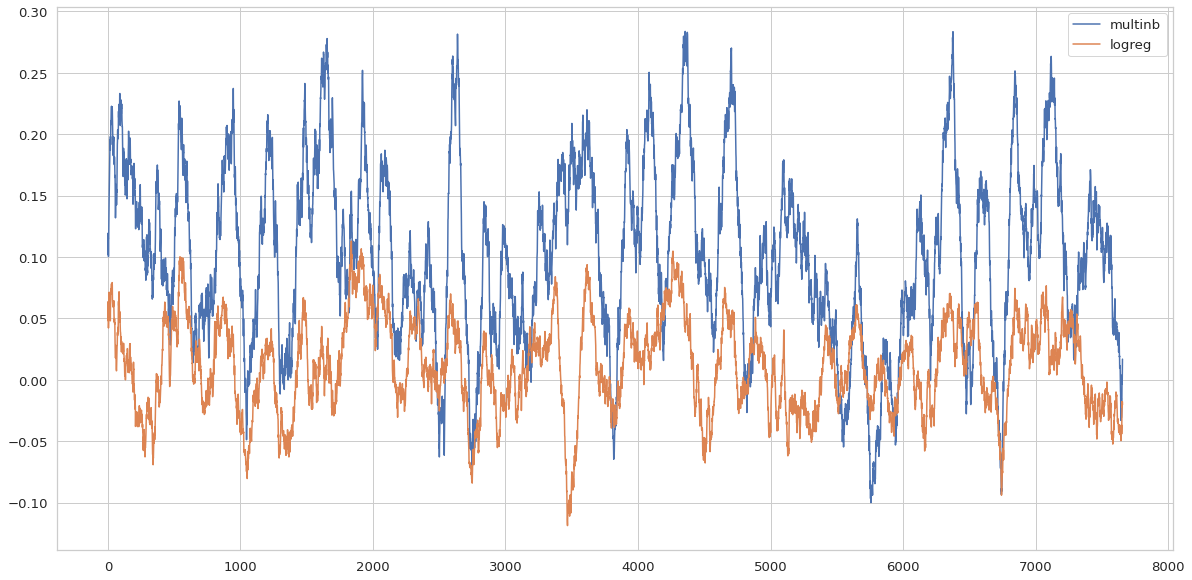

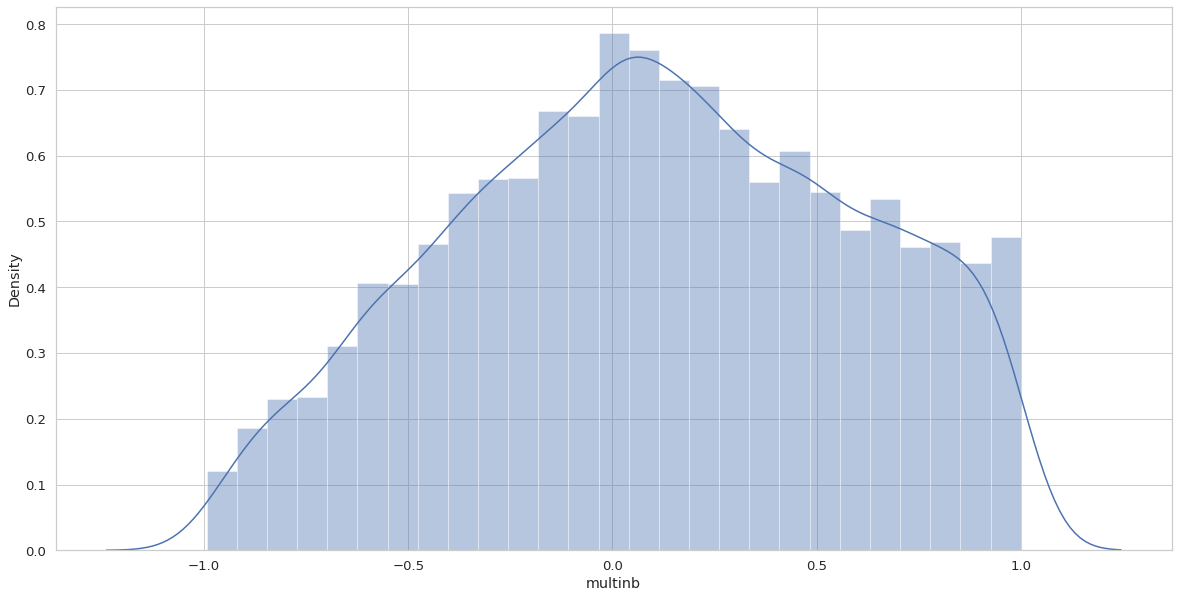

In [201]:
# Verify SMA Plot and Histogram

_= corpus_texts_dt[corpus_texts_ls[0]][['multinb','logreg']].rolling(100, center=True, min_periods=0).mean().plot()
plt.show()

sns.distplot(corpus_texts_dt[corpus_texts_ls[0]]['multinb'], kde=True)

### [SKIP]

In [ ]:
# analyzer is the parameter that the vectorizer reads the input data in word unit or character unit to create a matrix
# vocabulary is the parameter that the vectorizer creates the matrix by using only input data or some other source 
# Other parameters are self-explanatory and already mentioned in other notebooks.

tfidf_vectorizer = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 1000)



In [ ]:
%%time

# NOTE: 1m27s 40000 max_features
#       1m09s  1000 max_features

# Handle with care especially when you transform the test dataset. (Wrong: fit_transform(X_test))

# train_features = tfidf_vectorizer.fit_transform(training_df['text_clean']) # X_train['clean'])
# test_features = tfidf_vectorizer.transform(corpus_sents_df['sent_clean']) # X_test['clean'])

In [ ]:
%%time

# Fit a naive bayes model to the training data.
# This will train the model using the word counts we computer, and the existing classifications in the training set.

# model = MultinomialNB()
# model.fit(train_features, training_df['polarity']) # [int(r[1]) for r in reviews])

In [ ]:
%%time

# NOTE: 0m33s on 20210916 at 06:12 (jausten_prideandprejudice)

# Now we can use the model to predict classifications for our test features.

predictions_corpus = model.predict(X_corpus)

In [ ]:
corpus_sents_df['multinb'].apply(lambda x: 4*(x-0.6)).rolling(900, center=True).mean().plot(label='MultinomialNB')
corpus_sents_df['sentimentr_stdscaler'].rolling(900, center=True).mean().plot(label='SentimentR')
corpus_sents_df['vader_stdscaler'].rolling(900, center=True).mean().plot(label='VADER')
plt.legend(loc='best');
plt.title(f'{CORPUS_FULL}\nMultinomial Naive Bayes (Default w/IMDB) SMA=10%');

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [ ]:
X_train.shape
y_train.shape

In [ ]:
%%time

score = 'f1_macro'
print("# Tuning hyper-parameters for %s" % score)
print()
np.errstate(divide='ignore')
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring=score)
clf.fit(X_train, y_train)

In [ ]:
# Results of grid search for hyperparameters

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
for mean, std, params in zip(clf.cv_results_['mean_test_score'], 
                             clf.cv_results_['std_test_score'], 
                             clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, clf.predict(x_test), digits=4))
print()

In [ ]:
corpus_sents_df.head()

In [ ]:
# analyzer is the parameter that the vectorizer reads the input data in word unit or character unit to create a matrix
# vocabulary is the parameter that the vectorizer creates the matrix by using only input data or some other source 
# Other parameters are self-explanatory and already mentioned in other notebooks.

tfidf_vectorizer = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)



In [ ]:
%%time

# NOTE: 1m27s

# Handle with care especially when you transform the test dataset. (Wrong: fit_transform(X_test))

train_features = tfidf_vectorizer.fit_transform(training_df['text_clean']) # X_train['clean'])
test_features = tfidf_vectorizer.transform(corpus_sents_df['sent_clean']) # X_test['clean'])

In [ ]:
# Create the list of vocabulary used for the vectorizer.

vocab = tfidf_vectorizer.get_feature_names()
print(vocab[:5])

In [ ]:
# Print vocabulary length

print("Vocabulary length:", len(vocab))

In [ ]:
# Print frequency of each word

dist = np.sum(train_features, axis=0)
word_dist_df = pd.DataFrame(dist,columns = vocab)
word_dist_df

In [ ]:
print('Training dim:',train_features.shape, 'Test dim:', test_features.shape)

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [ ]:
%%time

# Naive Bayes

model = MultinomialNB()

model.fit(train_features, training_df['text_clean'] )

In [ ]:
%whos

In [ ]:
%%time

predictions = model.predict(test_features)

In [ ]:
# Naive Bayes

# sv = LinearSVC(random_state=2018)
model = MultinomialNB()

param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)], # , (2, 2)],
    # 'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'alpha': [1, 1e-1, 1e-2]
}

param_grid2 = {
    'loss':['squared_hinge'],
    'class_weight':[{1:4}],
    'C': [0.2]
}
kfold=5

# gs_sv = GridSearchCV(sv, param_grid = [param_grid2], verbose = 1, cv = kfold, n_jobs = 1, scoring = 'roc_auc')
gs_model = GridSearchCV(model, param_grid = [param_grid], verbose = 1, cv = kfold, n_jobs = 1, scoring = 'roc_auc')
gs_model.fit(train_tv, training_df['polarity'])
gs_model_best = gs_model.best_estimator_
print(gs_model.best_params_)

In [ ]:
  # Vectorize Training dataset with TF-IDF
  # NOTE: 1m11s
  vectorizer = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), stop_words=stopwords_en, max_features=FEATURES_MAX)

  # Select 'text_clean' or 'text_raw'
  embeddings = vectorizer.fit_transform(corpus_sents_df['sent_clean'])  
  # embeddings = vectorizer.fit_transform(df.text_raw)

  emb_words_df = pd.DataFrame(embeddings.toarray(), columns=vectorizer.get_feature_names())
  # emb_words_df.head()

  # Split text features/vectorized samples from labels
  X = emb_words_df
  y = df.polarity # sentiment

  return X, y, vectorizer

In [ ]:
# Hyperparamters

NGRAM_MAX = 3
FEATURES_MAX = 1000


# Vectorize Training dataset with TF-IDF
# NOTE: 1m11s
vec = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), stop_words=stopwords_en, max_features=FEATURES_MAX)

In [ ]:
model.predict(vec.transform(['Love this app simply awesome!']))

In [ ]:
X_corpus, y = tfidf_embeddings(training_df, text_clean_col='text_clean')

X, y = tfidf_embeddings(training_df)

### **Support Vector Machine (svm)**

In [ ]:
from sklearn.svm import LinearSVC

In [223]:
#Creating a Pipeline

# https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#5.-Predictive-Modelling-using-Deep-Learning
# model = LinearSVC(penalty='l2',loss = 'hinge')

clf = Pipeline(steps =[
                       ('preprocessing', CountVectorizer()),
                       # ('classifier', LinearSVC())
                       ('classifier', LinearSVC(penalty='l2',loss = 'hinge'))
                       ])
#Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', CountVectorizer()),
                ('classifier', LinearSVC(loss='hinge'))])

In [214]:
# Calculation model Scores

# (C=1e9, solver='lbfgs', max_iter=10): 0.8722
# (dual=False,max_iter=2000):  0.8812
# (C=1e9, solver='lbfgs', max_iter=2000): 0.8651

# clf.score(X_valid, Y_valid)
clf.score(X_test,y_test)

0.8584249268932137

In [ ]:
# Create and train a linear support vector classifier (LinearSVC)
# SST2: 20s 
# IMDB50k: 1.7s

# Linear SVC

# https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#5.-Predictive-Modelling-using-Deep-Learning

In [217]:
preds = clf.predict(corpus_texts_dt[corpus_texts_ls[0]]['text_raw'])
preds.shape

(7657,)

In [219]:
sentiment_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Process #{i}: {atext}')

  preds_np = clf.predict(corpus_texts_dt[corpus_texts_ls[0]]['text_raw'])

  corpus_texts_dt[corpus_texts_ls[0]]['svm'] = preds_np
  # corpus_texts_dt[corpus_texts_ls[0]]['logreg'] = corpus_texts_dt[atext]['text_raw'].apply(lambda x : )

Process #0: imcewan_machineslikeme


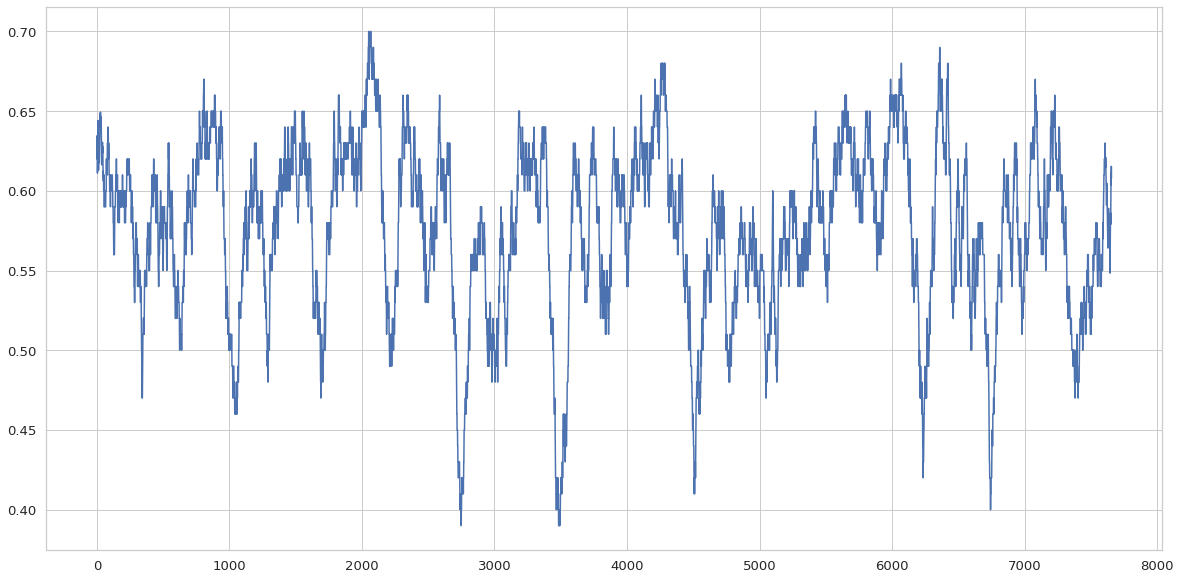

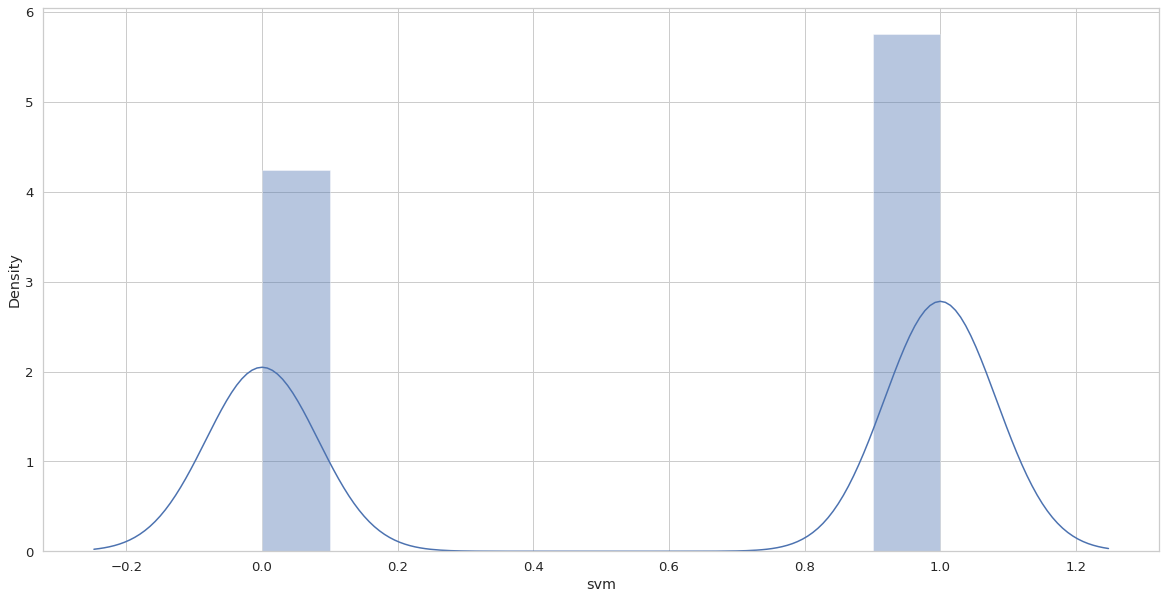

In [220]:
# Verify SMA Plot and Histogram

_= corpus_texts_dt[corpus_texts_ls[0]]['svm'].rolling(100, center=True, min_periods=0).mean().plot()
plt.show()

sns.distplot(corpus_texts_dt[corpus_texts_ls[0]]['svm'], kde=True)

In [236]:
X_train[0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience w

**Use Decision Funtion to get smooth continuous sentiment values**

https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/text/linear_classifier_svm.html


In [237]:
type(CountVectorizer.fit_transform(X_train[0]))

TypeError: ignored

In [230]:
Z = clf.decision_function(np.c_[CountVectorizer(X_train), CountVectorizer(y_train)]) # np.c_[xx.ravel(), yy.ravel()])

TypeError: ignored

### **Linear Regression (linreg)**

In [241]:
from sklearn.linear_model import LinearRegression

In [242]:
%%time 

# NOTE: 

#Creating a Pipeline
clf = Pipeline(steps =[
                       ('preprocessing', CountVectorizer()),
                       ('classifier', LinearRegression())
                       ])
#Fitting the model
clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# Calculation model Scores

clf.score(X_test,y_test)

In [ ]:
sentiment_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'Process #{i}: {atext}')

  preds_ls = clf.predict_proba(corpus_texts_dt[corpus_texts_ls[0]]['text_raw'])
  for prob_neg, prob_pos in preds_ls:
    # print(f'\nprob_neg: {prob_neg} vs prob_pos: {prob_pos}')
    sentiment_fl = prob_pos - prob_neg
    sentiment_ls.append(sentiment_fl)

  corpus_texts_dt[corpus_texts_ls[0]]['linreg'] = sentiment_ls
  # corpus_texts_dt[corpus_texts_ls[0]]['logreg'] = corpus_texts_dt[atext]['text_raw'].apply(lambda x : )

In [ ]:
# Verify SMA Plot and Histogram

_= corpus_texts_dt[corpus_texts_ls[0]]['linreg'].rolling(100, center=True, min_periods=0).mean().plot()
plt.show()

sns.distplot(corpus_texts_dt[corpus_texts_ls[0]]['linreg'], kde=True)

### **Logistic Regression (logreg)**

In [ ]:
# logistic regression

model_name = 'lr'

# model = LogisticRegression()
model = LogisticRegression(C=1e9, solver='lbfgs', max_iter=10)

model.fit(Xtrain_tfidf,ytrain)
p1=model.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("\nLogistic Regression Accuracy :", "{:.2f}%".format(100*s1))
_ = plot_confusion_matrix(model, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)


In [ ]:
"""
text_sa_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),]) # model),])
text_sa_clf.fit(Xtrain_tfidf,ytrain)
predictions = text_sa_clf.predict(Xtrain_tfidf)
accuracy_train = accuracy_score(ytrain, predictions)
print('Accuracy Score for train :',accuracy_train)
"""


In [ ]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)

y = imdb_df.sentiment.values
X = tfidf.fit_transform(imdb_df['review'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, shuffle=True)
# clf = LogisticRegressionCV(cv=5, scoring="accuracy", random_state=1, n_jobs=-1, verbose=3,max_iter=300).fit(X_train, y_train)
clf = LogisticRegression(C=1e9, solver='lbfgs', max_iter=10)
clf.fit(X_train, y_train)
# yhat = clf.predict(X_test)


# print("\nTrain Accuracy:")
# print(clf.score(X_test, y_test))

yhat=clf.predict(X_test)
# s1=accuracy_score(X_test,yhat)
s1 = clf.score(y_test, yhat)
# print("\nTest Accuracy:")
# print(clf.score(X_test, y_test))

print("\nLogistic Regression Accuracy :", "{:.2f}%".format(100*s1))
_ = plot_confusion_matrix(clf, X_test, yhat,cmap = 'Blues')
plt.grid(False)

# model_performance(X_train, y_train, X_test, y_test, clf)

In [ ]:
tfidf2 = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer='fill', use_idf=True, norm='l2', smooth_idf=True)
# y = df.sentiment.values
Xjoker = tfidf2.transform(jokerData)

yhat = Clf.predict(Xjoker)

# 25,584

In [ ]:
new_reviews = ['Old version of python useless', 'Very good effort, but not five stars', 'Clear and concise']
X_new = tfidf_vect.transform(new_reviews)
model.predict(X_new)

In [ ]:
Xtest_tfidf = tfidf_vect.transform(Xtest)

In [ ]:
Xtemp_tfidf = tfidf_vect.transform(temp_df) # ['text_clean'])
preds_model =model.predict(Xtemp_tfidf)
preds_model

In [ ]:
#splitting into train and test

train, test= train_test_split(temp, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [ ]:
tfidf_vect.fit_transform('I love lint')

In [ ]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  sents_tfidf_ser = tfidf_vect.fit_transform(corpus_texts_dt[atext]['text_raw'])
  corpus_texts_dt[atext][model_name] = lr.predict(sents_tfidf_ser)

#### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

subdir_path = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
!ls $subdir_path

/gdrive/MyDrive/sentimentarcs_notebooks


SUBDIR_SENTIMENT_RAW: sentiment_raw_novels_new_corpus3/


Existing Sentiment Datafiles in Destination Subdir:

sentiment_raw_novels_new_corpus3_all_1emb.json
sentiment_raw_novels_new_corpus3_all_1heu.json
sentiment_raw_novels_new_corpus3_all_7lex.json


In [ ]:
# Verify Saving Corpus

print(f'Saving Corpus_Genre: {Corpus_Genre}')
print(f'        Corpus_Type: {Corpus_Type}')
print(f'      Corpus_Number: {Corpus_Number}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Corpus_Genre: novels
        Corpus_Type: new
      Corpus_Number: 3

These Text Titles:



dict_keys(['imcewan_machineslikeme'])

In [244]:
%whos list

Variable           Type    Data/Info
------------------------------------
corpus             list    n=5806557
corpus_texts_ls    list    n=1
corpus_titles_ls   list    n=1
preprocessed_ls    list    n=1
sentiment_ls       list    n=0
stop               list    n=179
stopwords_en       list    n=179
words_ls           list    n=3


In [245]:
%whos dict

Variable          Type    Data/Info
-----------------------------------
bi_negative       dict    n=20
bi_positive       dict    n=20
corpus_texts_dt   dict    n=1
lexicons_dt       dict    n=6
mapping           dict    n=120
params            dict    n=37
test_dt           dict    n=1
tri_negative      dict    n=20
tri_positive      dict    n=20
uni_negative      dict    n=20
uni_positive      dict    n=20
uploaded          dict    n=1
vs                dict    n=4


In [248]:
?get_ensemble_model_famalies

In [251]:
corpus_texts_dt[corpus_texts_ls[0]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 0 to 7656
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   text_raw                    7657 non-null   object 
 1   text_clean                  7657 non-null   object 
 2   pysentimentr_jockersrinker  7657 non-null   float64
 3   pysentimentr_huliu          7657 non-null   float64
 4   pysentimentr_nrc            7657 non-null   float64
 5   pysentimentr_sentiword      7657 non-null   float64
 6   pysentimentr_senticnet      7657 non-null   float64
 7   pysentimentr_lmcd           7657 non-null   float64
 8   afinn                       7657 non-null   float64
 9   vader                       7657 non-null   float64
 10  textblob                    7657 non-null   float64
 11  pattern                     7657 non-null   float64
 12  logreg                      7657 non-null   float64
 13  multinb                     7657 

In [ ]:
# Save sentiment values to subdir_sentiments

models_save_ls = ['logreg', 'multinb', 'svm']
if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_all_5ml.json'
  print(f'Saving to:\n  {save_filename}')
elif Corpus_Type == 'reference':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_all_5ml.json'
  print(f'Saving file:\n  {save_filename}')
else:
  save_filename = ''
  print(f'ERROR: Illegal value for Corpus_Type: {Corpus_Type}')

if len(save_filename) > 0:
  print(f'Writing to subdir:\n  {subdir_path}')
  write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=subdir_path)

Saving to:
  sentiment_raw_novels_new_corpus3_all_1ling.json
Writing to subdir:
  ./sentiment_raw/sentiment_raw_novels_new_corpus3/
Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus3/sentiment_raw_novels_new_corpus3_all_1ling.json


In [ ]:
# Verify Dictionary was saved correctly 

!ls -altr $subdir_path

total 16153
-rw------- 1 root root 3783384 Apr 22 09:26 sentiment_raw_novels_new_corpus3_all_7lex.json
-rw------- 1 root root 4006294 Apr 22 09:27 sentiment_raw_novels_new_corpus3_all_1heu.json
-rw------- 1 root root 4253375 Apr 22 09:29 sentiment_raw_novels_new_corpus3_all_1emb.json
-rw------- 1 root root 4496067 Apr 22 09:31 sentiment_raw_novels_new_corpus3_all_1ling.json


In [ ]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=subdir_path)
test_dt.keys()
print('\n')
test_dt[corpus_texts_ls[0]].info()

dict_keys(['imcewan_machineslikeme'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   afinn                       7657 non-null   float64
 1   pattern                     7657 non-null   float64
 2   pysentimentr_huliu          7657 non-null   float64
 3   pysentimentr_jockersrinker  7657 non-null   float64
 4   pysentimentr_lmcd           7657 non-null   float64
 5   pysentimentr_nrc            7657 non-null   float64
 6   pysentimentr_senticnet      7657 non-null   float64
 7   pysentimentr_sentiword      7657 non-null   float64
 8   text_clean                  7657 non-null   object 
 9   text_raw                    7657 non-null   object 
 10  textblob                    7657 non-null   float64
 11  vader                       7657 non-null   float64
dtypes: float64(10), object(2)
memory usage: 718.0+ KB


## **Ensemble ML Models**

### **Random Forest (rforest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time

# Create and train a random forest classifier
# SST2: 27m-1500s/50n_est  36s/5n_est (default n_estimators=50)
# IMDB50k: 46s (n_est=50)

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 (Hyperparm search)
# https://github.com/WillKoehrsen/Machine-Learning-Projects/tree/master/random_forest_explained (github/Jupyter)

model = RandomForestClassifier(n_estimators=50)
model.fit(X, y)
metrics(model, X_test, y_test)

In [ ]:
%%time

# Create and train a random forest classifier
# SST2: 27m-1500s/50n_est  36s/5n_est (default n_estimators=50)
# IMDB50k: 46s (n_est=50)

# https://www.kaggle.com/itsmanas/stock-sentiment-analysis-85-9-accuracy/data#Train-Test-Splitting

model = RandomForestClassifier(n_estimators=200,criterion='entropy')
model.fit(X, y)
metrics(model, X_test, y_test)

### **XGBoost (xgb)**

* https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/ (Gradient Boosting)

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
%%time

model = XGBClassifier()
model.fit(X_train, y_train)
metrics(model, X_test, y_test)

### **LightGBM (lgbm)**

* https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# lightgbm for classification

from numpy import mean
from numpy import std

# from sklearn.datasets import make_classification

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X, y)
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

### **CATBoost (catb)**

* https://www.kaggle.com/aryantiwari123/tweets-sentiment-analysis

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# y_1d = np.squeeze(y, -1)
y_1d.shape

In [ ]:
X.shape

In [ ]:
X_np = X.to_numpy()
X_np.shape
type(X_np)

In [ ]:
y_np = y.to_numpy()
# type(np)
print(y_np.shape)
y_np_s = np.squeeze(y_np)
y_np_s.shape
type(y_np_s)

In [ ]:
def model_classify(model, X, y):

    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

    # model training
    # pipeline_model = Pipeline([('vect', CountVectorizer()),
    #                           ('tfidf', TfidfTransformer()),
    #                           ('clf', model)])
    
    pipeline_model = Pipeline([('clf',model)])

    pipeline_model.fit(x_train, y_train)
    print('done: fit')
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.estimators.plot_learning_curve(pipeline_model, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
    plt.show()
    print(classification_report(y_test, y_pred))

In [ ]:
%time

# NOTE: 15m

model = AdaBoostClassifier(base_estimator = None)
model_classify(model, X_np, y_np)
metrics(model, X_test, y_test)

### **AdaBoost (adab)**

In [ ]:
%time

model = AdaBoostClassifier(base_estimator = None)
model.fit(X_train, y_train)
metrics(model, X_test, y_test)

#### Setup and Configuration


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.sparse import save_npz, load_npz  # load/save sparse matrices
from joblib import dump, load # load/save sklearn objects efficiently

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [ ]:
# Vectorizing text
from sklearn.feature_extraction.text import TfidfVectorizer


# Validation: https://www.kaggle.com/pocooo/types-of-cross-validation-all-you-need

# Simple Cross Fold Validation
from sklearn.model_selection import KFold
# model=DecisionTreeClassifier()
kfold_validation=KFold(10)

# import numpy as np
from sklearn.model_selection import cross_val_score
# results=cross_val_score(model,X,y,cv=kfold_validation)
# print(results)
# print(np.mean(results))

# Stratified CV 
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
# model=DecisionTreeClassifier()
# scores=cross_val_score(model,X,y,cv=skfold)
# print(np.mean(scores))

# LOO CV
from sklearn.model_selection import LeaveOneOut
# model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
# results=cross_val_score(model,X,y,cv=leave_validation)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# TODO: Next few cells unneeded?

In [ ]:
nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
stopwords_custom = ['bazinga', 'hoohaw', 'pating']
stopwords_en.extend(stopwords_custom)

In [ ]:
# Utility Functions for ML Model Metrics

# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

def lexicon_metrics(y, y_pred):
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

In [ ]:
from sklearn.pipeline import Pipeline
text_clf_SGDClassifier = Pipeline([('vect', CountVectorizer(ngram_range=(2,4), stop_words='english',lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),
])
text_clf_SGDClassifier.fit(X, y)



In [ ]:
!ls ./data

In [ ]:
# TEST
fld = './data/'

[os.path.join(fld, f) for f in os.listdir() if os.path.isfile(os.path.join(fld, f))]

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly
import plotly.graph_objs as go
# import plotly.offline as ply
# plotly.offline.init_notebook_mode()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
classifier_names = ['Naive Bayes', 
                    'Decision Tree', 
                    'Random Forest', 
                    'Nearest Neighbors', 
                    'Neural Network']

classifiers = [GaussianNB(),
               DecisionTreeClassifier(max_depth=10),
               RandomForestClassifier(max_depth=10),
               KNeighborsClassifier(5),
               MLPClassifier()]

plot_data=[]

clf_data=zip(classifier_names, classifiers)

for clf_name, clf in clf_data:
    print('Running '+clf_name)
    kf=StratifiedKFold(n_splits=10, shuffle=True)
    scores=cross_val_score(clf, X, y, cv=kf)
    print(scores)
    plot_data.append(
        go.Scatter(
            x=[i+1 for i in range(10)],
            y=scores,
            mode='lines',
            name=clf_name
        )
    )



#### Download Sentiment IMDB Training Dataset (if necessary)

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Check if IMDB datafile exists, download if missing

filepath_imdb = f"{SUBDIR_DATA}imdb-dataset-of-50k-movie-reviews.zip"
print(f'filepath: {filepath_imdb}')

my_file = Path(filepath_imdb)
if my_file.is_file():
  print('\n[SKIP] to the next Section [Load IMDB Dataset]\n       IMDB training dataset already exists\n')
else:
  print('\n[CONTINUE] executing code cells')


In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Get IMDB Dataset

%cd ./data
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip
!ls -altr

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

### Prepare IMDB Dataset

In [ ]:
# Verify in project root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
imdb50k_df = pd.read_csv(f"{SUBDIR_DATA}IMDB Dataset.csv")
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

# supervised_db = 'imdb50k'

imdb50k_df.head()
imdb50k_df.info()

#### Clean and Split Training Dataset

In [ ]:
import nltk
nltk.download('omw-1.4')

In [ ]:
import texthero as hero
from texthero import preprocessing

stem_pipeline = [preprocessing.fillna,
                 preprocessing.lowercase,
                 preprocessing.remove_digits,
                 preprocessing.remove_punctuation,
                 preprocessing.remove_diacritics,
                 preprocessing.remove_stopwords,
                 preprocessing.remove_whitespace,
                 preprocessing.stem]

In [ ]:
%%time

# NOTE: 3m55s @02:54 on 20220302 Colab Pro
#        

imdb50k_df['text_clean'] = imdb50k_df['text_raw'].pipe(hero.clean, stem_pipeline)

In [ ]:
# Saved Cleaned IMDB Training Text Datafile

fname_imdb50k_clean = f'{SUBDIR_DATA}imdb50k_clean.csv'
imdb50k_df.to_csv(fname_imdb50k_clean, index=False)
!ls -altr 

In [ ]:
!ls ./data

In [ ]:
TRAIN_TEST_SPLIT_PER = 0.8

data_len = imdb50k_df.shape[0]
split_indx = int(TRAIN_TEST_SPLIT_PER * data_len)

train_df = imdb50k_df[:split_indx]
test_df = imdb50k_df[split_indx:]

print(f'Splitting {TRAIN_TEST_SPLIT_PER*100:.2f}% of Training Data for Testing')
print(f'  There are {data_len} examples, {split_indx} of them used for Testing, {data_len - split_indx} for Training')

In [ ]:
train_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import datasets

In [ ]:
%%time

# NOTE: 

# Vectorize IMDB Review (Representation: Trigram TF-IDF)

# Step 1: Bigram
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bigram_vectorizer.fit(train_df['text_clean'].values)

# X_train_bigram = bigram_vectorizer.transform(train_df['text_clean'].values)


# Step 2: TF-IDF
# Texthero removes stopwords
# CountVectorizer includes high-freq bigrams
# CountVectorizer limits max_features/token vocabulary size
# without max features IMDB Training (40k reviews), X_train_bigram_tf_idf shape = (40000, 2211883)
# bigram_tf_idf_transformer = TfidfTransformer(ngram_range=(1,2), stop_words=stopwords_en_ls, max_features=1000)
bigram_tf_idf_transformer = TfidfTransformer()
bigram_tf_idf_transformer.fit(X_train_bigram)

X_train_bigram_tf_idf = bigram_tf_idf_transformer.transform(X_train_bigram)
X_train = X_train_bigram_tf_idf
y_train = train_df['polarity']


In [ ]:
type(X_train_bigram_tf)

In [ ]:
%%time

# NOTE: 50s

# Save checkpoint

!pwd
filename_save = f'{SUBDIR_DATA}imdb50k_stems.csv'
imdb50k_df.to_csv(filename_save, encoding='utf-8', index=False)
!ls -altr $SUBDIR_DATA

In [ ]:
!ls ./data

#### Vectorize IMDB Dataset

In [ ]:
%%time

# NOTE: 

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=stopwords_en_ls, max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text_clean)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
type(train_df.iloc[0]['polarity'])

In [ ]:
# For Statistical ML Models, prepare Dataset
#   separate text examples (X) from labels (y)

X = X_train_bigram_tf_idf # words_df
y = train_df['polarity'].values # imdb50k_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

In [ ]:
# Split labeled dataset into training, validation and test sets
# e.g. for IMDB 50k reviews: Out of 50k dataset, 36k for training, 4k for Validationa and 10k for testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=42)

print("Dataset Splits: Train, Valid, Test")
[x.shape for x in [X_train,X_valid,X_test]]

In [ ]:
X_train

In [ ]:
# Clean text_raw

for i, atext_str in enumerate(corpus_titles_ls):
  print(f'Processing #{i}: {atext_str}')

  corpus_texts_dt[atext_str].head()
  # df['text_clean'] = df['text_raw'].pipe(hero.clean)

In [ ]:
# Remove non-alphanumeric chacters
# imdb50k_df['text_lower'] = imdb50k_df['text_raw']

"""
pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
imdb50k_df['text_clean'] = imdb50k_df['text_raw'].str.lower().str.strip().str.findall(pattern).str.join(' ')
imdb50k_df.head(1)
""";

In [ ]:
import spacy

nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
%%time

# NOTE: (no stem) 4m09s
#       (w/ stem) 4m24s

i = 0

for key_novel, atext_df in corpus_texts_dt.items():

  print(f'Processing Novel #{i}: {key_novel}...')

  atext_df['text_clean'] = clean_text(atext_df, 'text_raw', text_type='formal')

  atext_df['text_clean'] = lemma_pipe(atext_df['text_clean'])
  atext_df['text_clean'] = atext_df['text_clean'].astype('string')

  # TODO: Fill in all blank 'text_clean' rows with filler semaphore
  atext_df.text_clean = atext_df.text_clean.fillna('this_blank')

  atext_df.head(2)

  print(f'  shape: {atext_df.shape}')

  i += 1

In [ ]:
# Verify the first Text in Corpus is cleaned

corpus_texts_dt[corpus_texts_ls[0]].head(20)
corpus_texts_dt[corpus_texts_ls[0]].info()

### Simple Models

In [ ]:
seed = 42
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
LinearDiscriminantAnalysis

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
seed=42

scoring = 'accuracy'
for name, model in models:
      kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

"""

LR: 0.862886 (0.005822)
LDA: 0.859657 (0.006562)
KNN: 0.728571 (0.008688)
CART: 0.710829 (0.007842)
NB: 0.817286 (0.007659)

""";

#### Linear Regression (linreg)

#### Logistic Regression (logreg)

#### Logistic Regression, 6-Fold CV (logreg_cv6)

#### Random Forest (rf)

#### Linear SVC (lin_svc)

#### Multinomial Naive Bayes (multi_nb)

In [ ]:


from sklearn.pipeline import Pipeline

text_clf_SGDClassifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,3), stop_words='english',lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),
])
text_clf_SGDClassifier.fit(X_train, y_train)
clf_linreg = LinearRegression()

clf_linreg.fit(X, y)


### Ensemble Models

#### XGBoost (xgb)

* https://xgboost.readthedocs.io/en/stable/

* https://github.com/dmlc/xgboost

* https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

In [ ]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

#### CatBoost (catb)

* https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb

* https://github.com/catboost/tutorials/

* https://catboost.ai/

In [ ]:
!pip install catboost

In [ ]:
import catboost
print(catboost.__version__)

In [ ]:
from catboost import CatBoostClassifier, Pool   # https://catboost.ai/

In [ ]:


model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    # cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

In [ ]:
%%time

# NOTE: 

# test_data = catboost_pool = Pool(X_train, y_train)

clf_catb = CatBoostClassifier(iterations=50,
                              random_seed=rand_seed,
                              depth=6,
                              learning_rate=0.5,
                              loss_function='Logloss',
                              verbose=5)

# train the model
clf_catb.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),
    verbose=True
)

print('Model is fitted: ' + str(clf_catb.is_fitted()))
print('Model params:')
print(clf_catb.get_params())

#### LightGBM (lgbm)

#### AdaBoost (adab)

## **AutoML**

### **AutoML: Optuna**

* https://github.com/optuna/optuna (20210826 5k) 

### **AutoML: Scikit-Optimize**

* https://github.com/scikit-optimize/scikit-optimize (20210622 2.2k) Sequential model-based optimization with a `scipy.optimize` interface
* https://scikit-optimize.github.io/stable/auto_examples/index.html 

### **AutoML: Auto-Sklearn**

* https://www.youtube.com/watch?v=CF-GZ9tK_Ik
* https://github.com/GauravSahani1417/Kaggle-Datasets/blob/master/Heart_failure_prediction_using_Auto_Sklearn_%F0%9F%A9%BA.ipynb 
* https://github.com/bhattbhavesh91/auto-sklearn-tutorial/blob/master/autosklearn-classification.ipynb (20200929 5s) (pip install Cython numpy)

In [ ]:
!pip install auto-sklearn

In [ ]:
!pip install scipy==1.7.0

In [ ]:
import scipy
print(scipy.__version__)

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
clf = AutoSklearnClassifier(time_left_for_this_task=1000, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)
# Init training
clf.fit(X_train, y_train)



In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [ ]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)

In [ ]:
print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')

### **AutoML: FLAML by Microsoft**

* pip install flaml[notebook] requires restart

In [ ]:
from flaml import AutoML

from sklearn.datasets import load_iris

In [ ]:
# Create test_flaml subdirectory to store log files

!mkdir test_flaml

In [ ]:
# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "test_flaml/flaml_10s.log",
}

In [ ]:
# X_train, y_train using TF-IDF of IMDB 50k

# List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)
# Predict
print(automl.predict_proba(X_train))

# Export the best model
print(automl.model)

In [ ]:
y_train.hist()

In [ ]:
# Set the Time Limit

TIME_LIM = 3600 # unit seconds (e.g. 600 = 10mins)

settings = {
    "time_budget": TIME_LIM,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
    "log_file_name": 'test_flaml/flaml_1200s.log',  # flaml log file
}

In [ ]:
# Search for the best models by fitting training data with hyperparameter settings

# NOTE: 33 iterations with 600s budget (10m), Best accuracy on validation data: 0.868

automl.fit(X_train=X_train, y_train=y_train, **settings)

"""
14 Sep 2021 1:24pm

[flaml.automl: 09-14 17:23:37] {1735} INFO - iteration 114, current learner lrl1
[flaml.automl: 09-14 17:23:52] {1920} INFO -  at 3595.3s,	best lrl1's error=0.1310,	best lrl1's error=0.1310
[flaml.automl: 09-14 17:23:52] {2021} INFO - selected model: LogisticRegression(C=0.6701935610138009, n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-14 17:24:10] {2084} INFO - retrain lrl1 for 17.9s
[flaml.automl: 09-14 17:24:10] {2088} INFO - retrained model: LogisticRegression(C=0.6701935610138009, n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-14 17:24:10] {1529} INFO - fit succeeded
[flaml.automl: 09-14 17:24:10] {1531} INFO - Time taken to find the best model: 2468.841588973999

===

14 Sep 2021 12:20pm

[flaml.automl: 09-14 15:45:13] {1735} INFO - iteration 42, current learner lrl1
[flaml.automl: 09-14 15:45:29] {1920} INFO -  at 1798.0s,	best lrl1's error=0.1320,	best lrl1's error=0.1320
[flaml.automl: 09-14 15:45:29] {2021} INFO - selected model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-14 15:45:47] {2084} INFO - retrain lrl1 for 18.0s
[flaml.automl: 09-14 15:45:47] {2088} INFO - retrained model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-14 15:45:47] {1529} INFO - fit succeeded
[flaml.automl: 09-14 15:45:47] {1531} INFO - Time taken to find the best model: 1653.2159299850464
[flaml.automl: 09-14 15:45:47] {1545} WARNING - Time taken to find the best model is 92% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

===

14 Sep 2021 11:05am

[flaml.automl: 09-14 14:41:05] {1735} INFO - iteration 33, current learner lrl1
[flaml.automl: 09-14 14:41:51] {1920} INFO -  at 621.9s,	best lrl1's error=0.1320,	best lrl1's error=0.1320
[flaml.automl: 09-14 14:41:51] {2021} INFO - selected model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-14 14:42:07] {2084} INFO - retrain lrl1 for 16.5s
[flaml.automl: 09-14 14:42:07] {2088} INFO - retrained model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 09-14 14:42:07] {1529} INFO - fit succeeded
[flaml.automl: 09-14 14:42:07] {1531} INFO - Time taken to find the best model: 562.4823379516602
[flaml.automl: 09-14 14:42:07] {1545} WARNING - Time taken to find the best model is 94% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

===

[flaml.automl: 08-18 05:53:11] {1461} INFO - selected model: LGBMClassifier(colsample_bytree=0.7733707792852584,
               learning_rate=0.11190988982157068, max_bin=128,
               min_child_samples=62, n_estimators=701, num_leaves=12,
               objective='binary', reg_alpha=0.001291764523034099,
               reg_lambda=0.5058442385321611, verbose=-1)
[flaml.automl: 08-18 05:53:11] {1184} INFO - fit succeeded
[flaml.automl: 08-18 05:53:11] {1185} INFO - Time taken to find the best model: 567.884330034256


[flaml.automl: 08-18 05:31:22] {1411} INFO -  at 291.7s,	best extra_tree's error=0.2469,	best lgbm's error=0.1504
[flaml.automl: 08-18 05:31:27] {1438} INFO - retrain extra_tree for 5.0s
[flaml.automl: 08-18 05:31:27] {1253} INFO - iteration 46, current learner lrl1
No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'.
[flaml.automl: 08-18 05:31:41] {1411} INFO -  at 310.7s,	best lrl1's error=0.1454,	best lrl1's error=0.1454
[flaml.automl: 08-18 05:31:41] {1461} INFO - selected model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 08-18 05:31:41] {1184} INFO - fit succeeded
[flaml.automl: 08-18 05:31:41] {1185} INFO - Time taken to find the best model: 310.6792550086975
[flaml.automl: 08-18 05:31:41] {1191} WARNING - Time taken to find the best model is 104% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

""";

In [ ]:
# Retrieve the best model and configuration

print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

"""
14 Sep 2021 1:24pm

Best ML leaner: lrl1
Best hyperparmeter config: {'C': 0.6701935610138009}
Best accuracy on validation data: 0.869
Training duration of best run: 20.48 s

===
14 Sep 2021 12:20pm

Best ML leaner: lrl1
Best hyperparmeter config: {'C': 1.0}
Best accuracy on validation data: 0.868
Training duration of best run: 16.45 s

===

14 Sep 2021 11:05am

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 701, 'num_leaves': 12, 'min_child_samples': 62, 'learning_rate': 0.11190988982157068, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 0.7733707792852584, 'reg_alpha': 0.001291764523034099, 'reg_lambda': 0.5058442385321611}
Best accuracy on validation data: 0.8516
Training duration of best run: 14.68 s

===

Best ML leaner: lrl1
Best hyperparmeter config: {'C': 1.0}
Best accuracy on validation data: 0.8546
Training duration of best run: 13.9 s

""";

In [ ]:
# Retrieve the best model(hyperparameters)

print(automl.model.estimator)

"""
14 Sep 2021 1:24pm
LogisticRegression(C=0.6701935610138009, n_jobs=-1, penalty='l1', solver='saga')

14 Sep 2021 12:20pm
LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')

14 Sep 2021 11:05am
LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')

===

LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')


""";

In [ ]:
# Use best model(hyperparameters) to compute predictions of testing dataset

y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]



In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc_y_test_predict = matthews_corrcoef(y_test, y_pred)
print(mcc_y_test_predict)

"""
14 Sep 2021 1:24pm
0.7204752708450008

14 Sep 2021 12:20pm
0.7204752708450008

14 Sep 2021 11:05am
0.7204752708450008

===

0.7274299237200138

""";

### **AutoML: AutoVIML**

In [ ]:
# https://www.kaggle.com/khotijahs1/using-autonlp-for-sentiment-analysis

from autoviml.Auto_NLP import Auto_NLP

### **AutoML: HyperOpt-Sklearn**

* https://github.com/hyperopt/hyperopt-sklearn
* https://github.com/hyperopt/hyperopt-sklearn/blob/master/notebooks/Demo-Iris.ipynb 

svc
svc_linear
svc_rbf
svc_poly
svc_sigmoid
liblinear_svc

knn

ada_boost
gradient_boosting

random_forest
extra_trees
decision_tree

sgd

xgboost_classification

multinomial_nb
gaussian_nb

passive_aggressive

linear_discriminant_analysis
quadratic_discriminant_analysis

one_vs_rest
one_vs_one
output_code

# **END**

# **[OLD STARTING POINT]**

In [ ]:
groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

**Install Libraries**

In [ ]:
# fast detection of character set encoding for text/files

!pip install cchardet

In [ ]:
!pip install pysbd

In [ ]:
# common ML code

!pip install sklearn

In [ ]:
%pip install contractions

In [ ]:
!pip install pysbd

In [ ]:
!pip install spacy

In [ ]:
import pysbd
import spacy
from pysbd.utils import PySBDFactory

# Conditionally loads english or french PySBD/NLTK Sentence tokenizers 
#   in parags2sents()

# nlp = spacy.blank('en')

# nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:


# or you can use it implicitly with keyword
# pysbd = nlp.create_pipe('pysbd')
# nlp.add_pipe(pysbd)

# doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
# print(list(doc.sents))
# [My name is Jonas E. Smith., Please turn to p. 55.]

**Import Libraries**

In [ ]:
import os
import sys
import io
import glob
import json
import contextlib

In [ ]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
import string

In [ ]:
from itertools import cycle  # For plotly

import collections
from collections import OrderedDict

In [ ]:
# Import libraries for logging

import logging
from datetime import datetime
import time                     # (TODO: check no dependencies and delete)
from time import gmtime, strftime

In [ ]:
import nltk

# Download for sentence tokenization
import nltk.data
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download for nltk/VADER sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') # Load the English Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # To normalize time series
from sklearn.preprocessing import StandardScaler # To Standardize time series: center(sub mean) and rescale within 1 SD (only for well-behaved guassian distributions)
from sklearn.preprocessing import RobustScaler   # To Standardize time series: center(sub median) and rescale within 25%-75% (1st-3rd) IQR (better for noisy, outliers distributions)

In [ ]:
minmax_scaler = MinMaxScaler()
mean_std_scaler = StandardScaler()
median_iqr_scaler = RobustScaler()

In [ ]:
# Zoom interpolates new datapoints between existing datapoints to expand a time series 

from scipy.ndimage.interpolation import zoom

In [ ]:
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy import signal
from scipy.signal import argrelextrema

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess
from statsmodels import robust

In [ ]:
corpus_sects_df = pd.DataFrame()

**Define Library-Dependent Objects**

In [ ]:
import contractions

In [ ]:
# Necessary to define before defining Utility Functions using these DataFrames

corpus_sents_df = pd.DataFrame()

**Configure Jupyter Notebook**

In [ ]:
from IPython.display import HTML, display

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure matplotlib and seaborn

# Plotting pretty figures and avoid blurry images
# %config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
# sns.set_context('talk')

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 100
plt.rc('figure', facecolor='white')

In [ ]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

%load_ext google.colab.data_table

In [ ]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from IPython.display import HTML

import plotly.graph_objects as go
import plotly.express as px
import plotly

In [ ]:
from IPython.display import HTML, display

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(corpus_transformer_df['sent_raw'])

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(corpus_sentimentr_df.iloc[:10]['sent_raw'])

**Configuration Details Snapshot**

In [ ]:
# Snap Shot of Time, Machine, Data and Library/Version Blueprint
# TODO:

In [ ]:
!pip list

In [ ]:
# !pip install watermark

In [ ]:
# %load_ext watermark

In [ ]:
# %watermark

# **Either (a) Load Precomputed Sentiment Series or (b) Calculate Sentiment Values**

Sentiment Models

* VADER [-1.0 to 1.0] zero peak
* TextBlob [-1.0 to 1.0] zero peak
* Stanza outliers [-1.0 to 199.0] pos, outliers(+peak)
* AFINN [-14 (-8 to 8) 20] discrete
* SentimentR 11,710 [-5.4 to 8.8] norm
* Syuzhet [-5.4 to 8.8] norm
* Bing [-100.0 (-20.0 to 20.0) 100] discrete, outliers
* Pattern [-1.0 to 1.0] norm
* SentiWord [-3.8 to 4.4] norm
* SenticNet [-3.8 to 10] norm
* NRC [-100.0 (-5.0 to 5.0) 100] zero, outliers

## **(b) Compute Baseline Sentiments (Auto)**

In [ ]:
plot_data

In [ ]:
%matplotlib inline

In [ ]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.Figure(data=plot_data, layout=layout)
ply.iplot(fig)

In [ ]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.scatter(data=plot_data, layout=layout)
fig.show()
# ply.iplot(fig)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    # MultinomialNB(),
    MLPClassifier()]

In [ ]:
seed = 50
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

"""

LR: 0.862886 (0.005822)
LDA: 0.859657 (0.006562)
KNN: 0.728571 (0.008688)
CART: 0.710829 (0.007842)
NB: 0.817286 (0.007659)

""";

In [ ]:
models2 = []

models2.append(('SVM', SVC()))
models2.append(('MultiNB', MultinomialNB()))
models2.append(('RFC', RandomForestClassifier()))
models2.append(('MultiLP', MLPClassifier()))

models2.append(('NuSVC', NuSVC(probability=True)))
models2.append(('AdaBC', AdaBoostClassifier()))
models2.append(('GradBC', GradientBoostingClassifier()))
models2.append(('LinDA', LinearDiscriminantAnalysis()))
models2.append(('QuadDA', QuadraticDiscriminantAnalysis()))

In [ ]:
results2 = []
names2 = []
scoring = 'accuracy'
for name, model in models2:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results2.append(cv_results)
      names2.append(name)
      msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
      print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    # MultinomialNB(),
    MLPClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
# WARNING: This will execute without error even if SpaCy model not loaded (silent error)
#          Must choose between En/Fr and consider PySBD sentence segementation as part of nlp pipeline

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    text = ''.join([c for c in text if c.isascii()])
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en]
    return lemma_list

# Test
print(lemmatize('I was running late and decided to to stop drinking.'))

In [ ]:
%%time

# Method #1: Lemmatize with Pandas apply()

# Note: on C.Dickens' Great Expectations

# imdb50k_df['text_lemma1'] = imdb50k_df['text_clean'].apply(lemmatize)
# imdb50k_df.head(3)


# Save checkpoint

# imdb50k_df.to_csv(f'mlimdb50k_lemma3_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

# files.download('mlimdb50k_lemma3_sents_df.csv')

In [ ]:
# Method #2: Lemmatize with spacy nlp.pipe

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe


In [ ]:
%%time

# Method #2: Lemmatize with spacy nlp.pipe
# Note: 22min

# imdb50k_df['text_lemma2'] = preprocess_pipe(imdb50k_df['text_clean'])
# imdb50k_df.head(3)

# imdb50k_df.rename(columns={'text_lemma3':'text_lemma'}, inplace=True)
# imdb50k_df.drop(columns=['text_lemma2'], inplace=True)

# Save checkpoint

# imdb50k_df.to_csv(f'mlimdb50k_lemma2_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')


In [ ]:
!pip install joblib

In [ ]:
# Method #3: Lemmatize with joblib parallelization

from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=2, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(imdb50k_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

# imdb50k_df['text_lemma3'] = preprocess_parallel(imdb50k_df['text_clean'], chunksize=1000)


In [ ]:
"""

if ML_Models_Arc == True:
  model_base = 'vader'
  model_name = 'vader_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

if VADER_Arc == True:
  # Sentiment evaluation function
  sid = SentimentIntensityAnalyzer()

  # Test
  sid.polarity_scores('hello world'


""";

#### **Preparing Labeled Sentiment Dataset**

* SST-2/SST-5
* IMDB
* Yelp
* Sentiment140

In [ ]:
# Upload kaggle credentials *.json file

files.upload()

In [ ]:
!pwd
!ls

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp kaggle.json /root/.kaggle/

In [ ]:
!ls /root/.kaggle/


**IMDB 50k (Movie)**

* https://huggingface.co/datasets/imdb

In [ ]:
!pwd

In [ ]:
!mkdir data

In [ ]:
%cd ./data
!pwd
!ls

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!ls

In [ ]:
!tar -xvf aclImdb_v1.tar.gz
!ls -altr

In [ ]:
!ls -altr

In [ ]:
supervised_db = 'imdb50k'

In [ ]:
!ls -altr *

In [ ]:
# Option A: Load in imdb_df

imdb50k_df = pd.read_csv("sa_train_lemma_imdb50k.csv")
imdb50k_df.head(1)
imdb50k_df.info()

"""
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

supervised_db = 'imdb50k'

"""

In [ ]:
# Option B: Create IMDB_df

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


In [ ]:
!ls *zip

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


In [ ]:
imdb50k_df = pd.read_csv("IMDB Dataset.csv")
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

supervised_db = 'imdb50k'

In [ ]:
imdb50k_df.info()

In [ ]:
# Remove non-alphanumeric chacters
# imdb50k_df['text_lower'] = imdb50k_df['text_raw']

pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
imdb50k_df['text_clean'] = imdb50k_df['text_raw'].str.lower().str.strip().str.findall(pattern).str.join(' ')
imdb50k_df.head(1)

In [ ]:
stopwords_custom

In [ ]:
nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
# WARNING: This will execute without error even if SpaCy model not loaded (silent error)
#          Must choose between En/Fr and consider PySBD sentence segementation as part of nlp pipeline

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en]
    return lemma_list

# Test
print(lemmatize('I was running late and decided to to stop drinking.'))

In [ ]:
%%time

# Method #1: Lemmatize with Pandas apply()

# Note: on C.Dickens' Great Expectations

imdb50k_df['text_lemma'] = imdb50k_df['text_clean'].apply(lemmatize)
imdb50k_df.head(3)

In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'mlimdb50k_lemma_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
!ls -altr

In [ ]:
!pwd

In [ ]:
files.download('mlimdb50k_lemma_sents_df.csv')

In [ ]:
files.download('ml_sents_df.csv')

In [ ]:
!rm mlimdb50k_lemma2_sents_df.csv


In [ ]:
# Method #2: Lemmatize with spacy nlp.pipe

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe


In [ ]:
%%time

# Method #2: Lemmatize with spacy nlp.pipe
# Note: 22min

imdb50k_df['text_lemma2'] = preprocess_pipe(imdb50k_df['text_clean'])
imdb50k_df.head(3)

In [ ]:
imdb50k_df.rename(columns={'text_lemma3':'text_lemma'}, inplace=True)

In [ ]:
imdb50k_df.drop(columns=['text_lemma2'], inplace=True)

In [ ]:
imdb50k_df.info()

In [ ]:
imdb50k_df.head()

In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'mlimdb50k_lemma2_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
!pip install joblib

In [ ]:
# Method #3: Lemmatize with joblib parallelization

from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=2, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(imdb50k_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

imdb50k_df['text_lemma'] = preprocess_parallel(imdb50k_df['text_clean'], chunksize=1000)


In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'sa_train_lemma_imdb50k.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
imdb50k_df.info()

In [ ]:
print(imdb50k_df.iloc[0]['text_lemma'])

In [ ]:
def list2str(str_ls):
  '''
  Given a list of string
  Return a all strings concatenated, separated by ' '
  '''
  joined_str = ' '.join(str_ls)

  return joined_str

imdb50k_df['text_lemma'] = imdb50k_df['text_lemma'].apply(list2str)
# imdb50k_df.drop(columns=['text_lemma'], inplace=True)

In [ ]:
imdb50k_df.drop(columns=['text_lemma3'],inplace=True)

In [ ]:
imdb50k_df.head(2)

In [ ]:
# imdb50k_df.rename(columns={'text_lemma':'text_clean'}, inplace=True)

In [ ]:
# def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
# TODO: pandas DataFrame.Series.apply(curried function)

# NOTE: SST2: >25m
# sst2_sents_df['text_lemma'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)

# imdb50k_df['text_lower'] = imdb50k_df['text_raw'].str.strip().str.lower()
# imdb50k_df.head()

In [ ]:
# Vectorize IMDB Training dataset with TF-IDF

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english') # + stopwords.words('french')

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=stopwords_en, max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text_clean)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
# Separate text from labels

X = words_df
y = imdb50k_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

**SST-5 (Text)**

**SST-2 (Text)**

* https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html (Accelerate with SpaCy pipelines/joblib)

**Retrieve via PyTorch TorchText**

* https://github.com/shayneobrien/sentiment-classification/blob/master/notebooks/02-naive-bayes-unigram.ipynb

In [ ]:
supervised_db = 'sst2'

In [ ]:
import torchtext
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from torchtext.vocab import Vectors
from tqdm import tqdm_notebook

In [ ]:
text = torchtext.data.Field(include_lengths = False)
label = torchtext.data.Field(sequential=False)
train, val, test = torchtext.datasets.SST.splits(text, label, filter_pred=lambda ex: ex.label != 'neutral')
text.build_vocab(train)
label.build_vocab(train)
train_iter, val_iter, test_iter = torchtext.data.BucketIterator.splits((train, val, test), batch_size=10, device=-1, repeat = False)
url = 'https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.vec'
text.vocab.load_vectors(vectors=Vectors('wiki.simple.vec', url=url))

**Retrieve from Kaggle Datasets**

In [ ]:
!kaggle datasets download -d atulanandjha/stanford-sentiment-treebank-v2-sst2

In [ ]:
!unzip stanford-sentiment-treebank-v2-sst2.zip

In [ ]:
!cat SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/README.txt

In [ ]:
!ls SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/

In [ ]:
!head -n 5 ./SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/datasetSentences.txt

In [ ]:
!head -n 5 ./SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels.txt

In [ ]:
sst2_sents_filename = './SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/dictionary.txt'
sst2_sents_df = pd.read_csv(sst2_sents_filename, sep='|', header=None) 
sst2_sents_df.columns = ['text_raw','phrase_id']
sst2_sents_df['text_raw'] = sst2_sents_df['text_raw'].astype('string')
sst2_sents_df.head(20)
sst2_sents_df.shape

In [ ]:
# def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
# TODO: pandas DataFrame.Series.apply(curried function)

# NOTE: SST2: >25m
# sst2_sents_df['text_lemma'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)

sst2_sents_df['text_lower'] = sst2_sents_df['text_raw'].str.strip().str.lower()
sst2_sents_df.head()

In [ ]:
# sst2_sents_df['text_clean'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)


In [ ]:
# sst2_sents_df['text_lower'] = sst2_sents_df['text_raw'].apply(lambda x: lower(x))

In [ ]:
sst2_labels_filename = './SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels.txt'
sst2_labels_df = pd.read_csv(sst2_labels_filename, sep='|') 
sst2_labels_df.columns = ['phrase_id','polarity_fl']
sst2_labels_df.head(20)
sst2_labels_df.shape

In [ ]:
sst2_df = pd.concat([sst2_sents_df.set_index('phrase_id'),sst2_labels_df.set_index('phrase_id')], axis=1, join='inner')
sst2_df.head()
sst2_df.info()

In [ ]:
def polarity_float2int(val_fl):
  '''
  Given a float between 0.0 and 1.0
  Return an integer between 0-5 mapped to every 0.2 interval
  '''
  val_int = 0
  if (val_fl < 0.2):
    val_int = 0
  elif (0.2 <= val_fl < 0.4):
    val_int = 1
  elif (0.4 <= val_fl < 0.6):
    val_int = 2
  elif (0.6 <= val_fl < 0.8):
    val_int = 3
  elif (0.8 <= val_fl <= 1.0):
    val_int = 4
  else:
    print(f'ERROR: polarity value must be [0.0-1.0] but was set to: {val_fl}')
    val_int = -99

  return val_int

# Test
polarity_float2int(0.55)


In [ ]:
sst2_df['polarity'] = sst2_df['polarity_fl'].apply(lambda x: polarity_float2int(x))

In [ ]:
sst2_df.head(10)
sst2_df.info()

In [ ]:
sst2_df.shape
sst2_df[sst2_df.polarity.isna()]

In [ ]:
"""

from sklearn.feature_extraction import text
# from sklearn.feature_extraction.text import TfidfVectorizer

stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

X = vectorizer.fit_transform(["this is an apple.","this is a book."])

idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

# printing the tfidf vectors
print(X)

# printing the vocabulary
print(vectorizer.vocabulary_)

""";

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])
len(stopwords_custom)
print('\n')
type(stopwords_custom)


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=stopwords_custom, max_features=1000)
vectors = vectorizer.fit_transform(sst2_df.text_lower)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
X = words_df
y = sst2_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

**Retrieve from Huggingface Datasets**

In [ ]:
# install datasets
!pip install datasets

# Make sure that we have a recent version of pyarrow in the session before we continue - otherwise reboot Colab to activate it
import pyarrow
if int(pyarrow.__version__.split('.')[1]) < 16 and int(pyarrow.__version__.split('.')[0]) == 0:
    import os
    os.kill(os.getpid(), 9)

In [ ]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric

from pprint import pprint

In [ ]:
# Currently available datasets and metrics
datasets = list_datasets()
metrics = list_metrics()

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)
print(f"🤩 Currently {len(metrics)} metrics are available on the hub:")
pprint(metrics, compact=True)

In [ ]:
# You can access various attributes of the datasets before downloading them
sst_dataset = list_datasets(with_details=True)[datasets.index('sst')]

pprint(sst_dataset.__dict__)  # It's a simple python dataclass

In [ ]:
# Downloading and loading a dataset
dataset = load_dataset('sst', split='validation[:10%]')

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info.__dict__)

## **Summary**

Baseline Models

* VADER [-1.0 to 1.0] zero peak
* TextBlob [-1.0 to 1.0] zero peak
* Stanza outliers [-1.0 to 199.0] pos, outliers(+peak)
* AFINN [-14 (-8 to 8) 20] discrete
* SentimentR 11,710 [-5.4 to 8.8] norm
* Syuzhet [-5.4 to 8.8] norm
* Bing [-100.0 (-20.0 to 20.0) 100] discrete, outliers
* Pattern [-1.0 to 1.0] norm
* SentiWord [-3.8 to 4.4] norm
* SenticNet [-3.8 to 10] norm
* NRC [-100.0 (-5.0 to 5.0) 100] zero, outliers

SentimentR Models

* Jockers_Rinker
* Jockers
* HuLiu
* NRC
* Loughran-McDonald
* SenticNet
* SentiWord

SyuzhetR Models

* Syuzhet
* Bing
* AFINN
* NRC

Tranformer Models

* NLPTown
* RoBERTa Large 15 Datasets
* BERT Yelp Dataset
* BERT Code Switching Hinglish
* IMDB 2-way 
* Huggingface Default (Distilled BERT)
* T5 IMDB 50k Dataset
* RoBERTa XML 8 Languages

# **END OF WORKING**